In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
r_df = pd.read_csv('real_instances.csv')
h_df = pd.read_csv('hand_drawn_instances.csv')
s_df = pd.read_csv('simulated_instances.csv')


In [3]:
pd.set_option('display.max_columns', None)

# Understanding the Real Instances

In [5]:
r_df.head()

,timestamp,label,well,id,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,ESTADO-XO,P-ANULAR,P-JUS-BS,P-JUS-CKGL,P-JUS-CKP,P-MON-CKGL,P-MON-CKP,P-MON-SDV-P,P-PDG,PT-P,P-TPT,QBS,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT,class,state
0,2014-12-17 14:27:45,9,WELL-00042,20141217142745,23.0,38.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,18358740.0,NaN,16771370.0,NaN,NaN,2190777.0,NaN,18979920.0,NaN,10180070.0,NaN,3.032789,40.20570,NaN,74.58371,58.95389,NaN,NaN
1,2014-12-17 14:27:46,9,WELL-00042,20141217142745,23.0,38.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,18358910.0,NaN,16771360.0,NaN,NaN,2190779.0,NaN,18979930.0,NaN,10180060.0,NaN,3.033681,40.20566,NaN,74.58370,58.95395,NaN,NaN
2,2014-12-17 14:27:47,9,WELL-00042,20141217142745,23.0,38.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,18359070.0,NaN,16771360.0,NaN,NaN,2190780.0,NaN,18979940.0,NaN,10180050.0,NaN,3.034572,40.20562,NaN,74.58369,58.95401,NaN,NaN
3,2014-12-17 14:27:48,9,WELL-00042,20141217142745,23.0,38.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,18359240.0,NaN,16771350.0,NaN,NaN,2190781.0,NaN,18979950.0,NaN,10180040.0,NaN,3.035463,40.20559,NaN,74.58368,58.95407,NaN,NaN
4,2014-12-17 14:27:49,9,WELL-00042,20141217142745,23.0,38.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,18359400.0,NaN,16771350.0,NaN,NaN,2190782.0,NaN,18979960.0,NaN,10180040.0,NaN,3.036354,40.20555,NaN,74.58368,58.95413,NaN,NaN


In [6]:
r_df.columns

Index(['timestamp', 'label', 'well', 'id', 'ABER-CKGL', 'ABER-CKP',
       'ESTADO-DHSV', 'ESTADO-M1', 'ESTADO-M2', 'ESTADO-PXO', 'ESTADO-SDV-GL',
       'ESTADO-SDV-P', 'ESTADO-W1', 'ESTADO-W2', 'ESTADO-XO', 'P-ANULAR',
       'P-JUS-BS', 'P-JUS-CKGL', 'P-JUS-CKP', 'P-MON-CKGL', 'P-MON-CKP',
       'P-MON-SDV-P', 'P-PDG', 'PT-P', 'P-TPT', 'QBS', 'QGL', 'T-JUS-CKP',
       'T-MON-CKP', 'T-PDG', 'T-TPT', 'class', 'state'],
      dtype='object')

The variables and labels are as follows:
* **timestamp**: it is for each instance ;
* **ABER-CKGL**: Opening of the GLCK (gas lift choke) [%];
* **ABER-CKP**: Opening of the PCK (production choke) [%];
* **ESTADO-DHSV**: State of the DHSV (downhole safety valve) [0, 0.5, or 1];
* **ESTADO-M1**: State of the PMV (production master valve) [0, 0.5, or 1];
* **ESTADO-M2**: State of the AMV (annulus master valve) [0, 0.5, or 1];
* **ESTADO-PXO**: State of the PXO (pig-crossover) valve [0, 0.5, or 1];
* **ESTADO-SDV-GL**: State of the gas lift SDV (shutdown valve) [0, 0.5, or 1];
* **ESTADO-SDV-P**: State of the production SDV (shutdown valve) [0, 0.5, or 1];
* **ESTADO-W1**: State of the PWV (production wing valve) [0, 0.5, or 1];
* **ESTADO-W2**: State of the AWV (annulus wing valve) [0, 0.5, or 1];
* **ESTADO-XO**: State of the XO (crossover) valve [0, 0.5, or 1];
* **P-ANULAR**: Pressure in the well annulus [Pa];
* **P-JUS-BS**: Downstream pressure of the SP (service pump) [Pa];
* **P-JUS-CKGL**: Downstream pressure of the GLCK (gas lift choke) [Pa];
* **P-JUS-CKP**: Downstream pressure of the PCK (production choke) [Pa];
* **P-MON-CKGL**: Upstream pressure of the GLCK (gas lift choke) [Pa];
* **P-MON-CKP**: Upstream pressure of the PCK (production choke) [Pa];
* **P-MON-SDV-P**: Upstream pressure of the production SDV (shutdown valve) [Pa];
* **P-PDG**: Pressure at the PDG (permanent downhole gauge) [Pa];
* **PT-P**: Downstream pressure of the PWV (production wing valve) in the production tube [Pa];
* **P-TPT**: Pressure at the TPT (temperature and pressure transducer) [Pa];
* **QBS**: Flow rate at the SP (service pump) [m3/s];
* **QGL**: Gas lift flow rate [m3/s];
* **T-JUS-CKP**: Downstream temperature of the PCK (production choke) [oC];
* **T-MON-CKP**: Upstream temperature of the PCK (production choke) [oC];
* **T-PDG**: Temperature at the PDG (permanent downhole gauge) [oC];
* **T-TPT**: Temperature at the TPT (temperature and pressure transducer) [oC];
* **class**: Label of the observation;
* **state**: Well operational status.

* **label**: instance label (event type);
* **well**: well name. Hand-drawn and simulated instances have fixed names. Real instances have names masked with incremental id;
* **id**: instance identifier. Hand-drawn and simulated instances have incremental id. Each real instance has an id generated from its first timestamp.


In [7]:
r_df.shape

(32872250, 33)

# Understand state & class (Real)

# 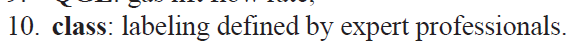

In [8]:
r_df['state'].value_counts()


state
0.0    25945294
1.0     1867665
6.0      566442
7.0      225990
2.0       83107
8.0       48291
3.0       44752
4.0       40095
5.0       22214
Name: count, dtype: int64

In [9]:
r_df['state'].sum()


7806495.0

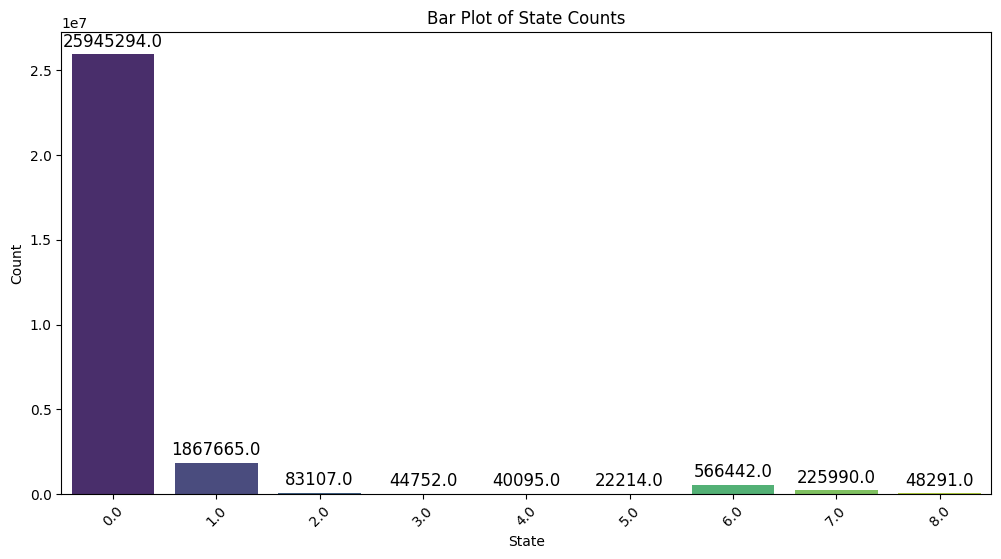

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your dataframe named r_df

# Plotting the bar plot for 'state' column
plt.figure(figsize=(12, 6))
bar_plot = sns.countplot(x='state', data=r_df, palette='viridis')
plt.title('Bar Plot of State Counts')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding count labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black')

plt.show()



In [11]:
r_df['class'].value_counts()


class
0.0      14570142
107.0     6670582
108.0     3655418
4.0       2454883
3.0        569152
105.0      320672
109.0      195443
8.0        140920
102.0       89091
101.0       65340
7.0         30339
2.0         21274
9.0         17752
6.0         13285
5.0         13205
1.0          9783
106.0        6569
Name: count, dtype: int64

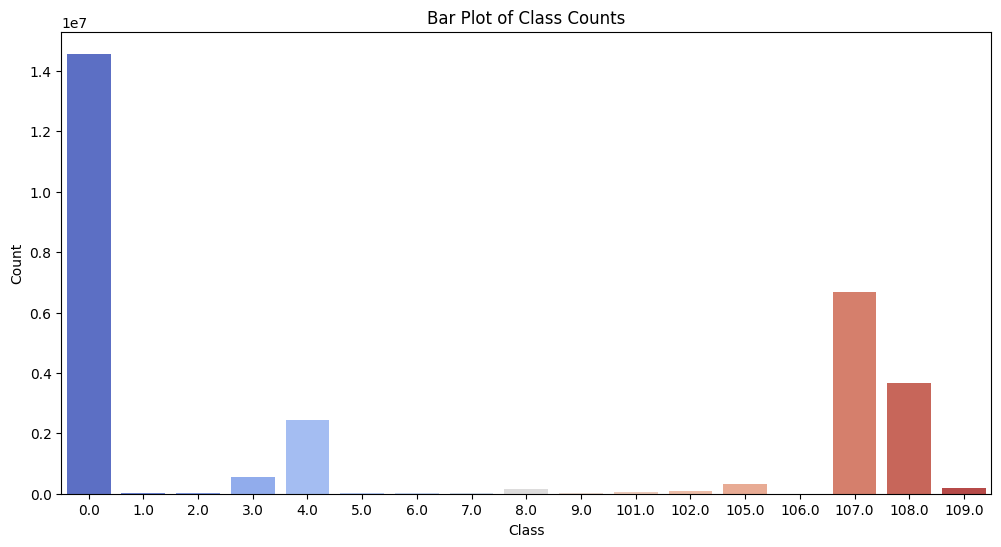

In [12]:
# Plotting the bar plot for 'class' column
plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=r_df, palette='coolwarm')
plt.title('Bar Plot of Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


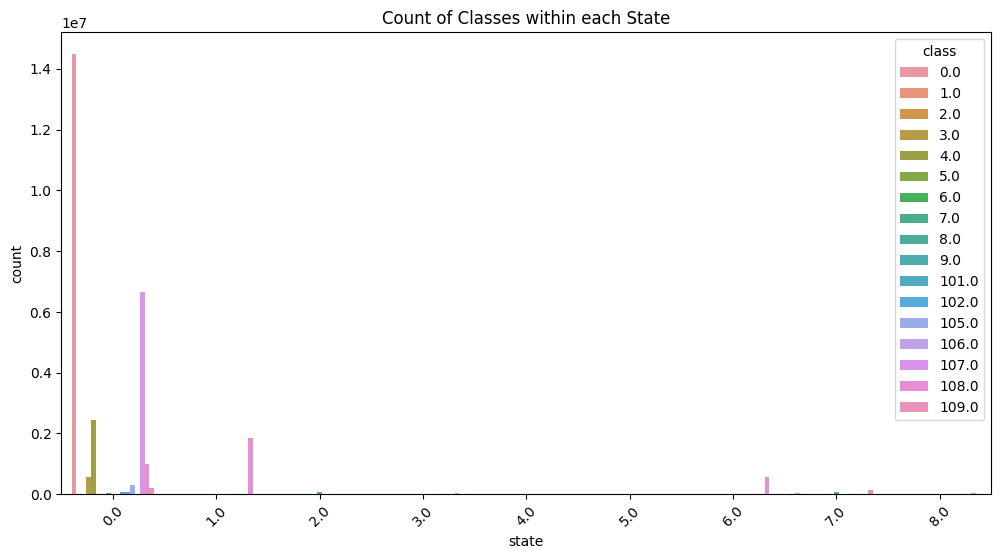

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot to show the distribution of 'class' within each 'state'
plt.figure(figsize=(12, 6))
sns.countplot(x='state', hue='class', data=r_df)
plt.title('Count of Classes within each State')
plt.xticks(rotation=45)
plt.show()


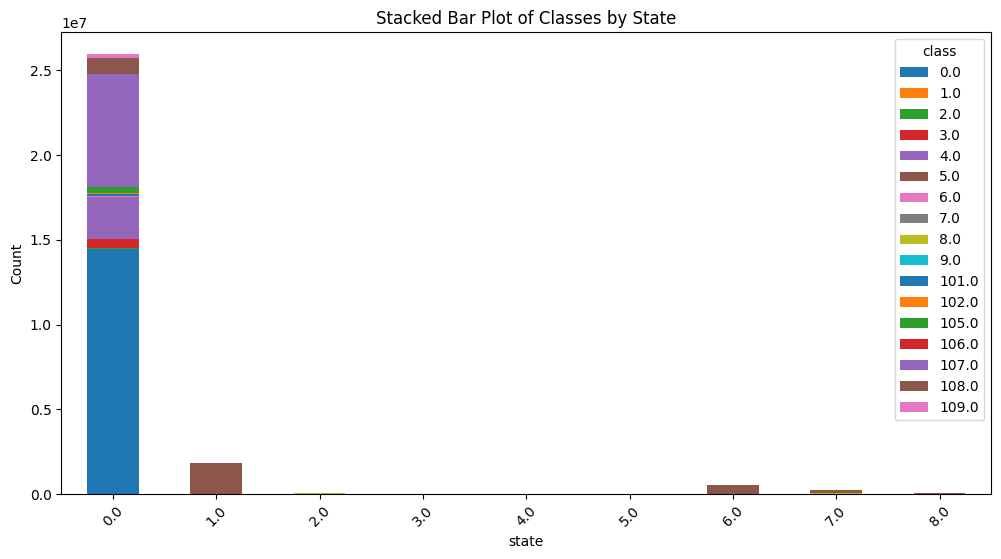

In [14]:
import pandas as pd

# Creating a pivot table for stacked bar plot
pivot_table = r_df.pivot_table(index='state', columns='class', aggfunc='size', fill_value=0)

# Plotting the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot of Classes by State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


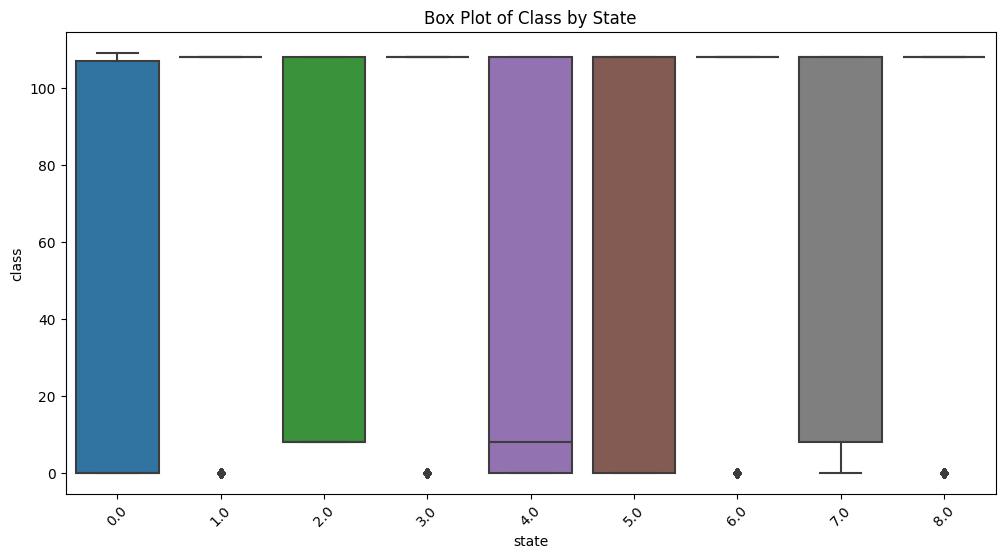

In [15]:
# Boxplot to show class distribution per state
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='class', data=r_df)
plt.title('Box Plot of Class by State')
plt.xticks(rotation=45)
plt.show()


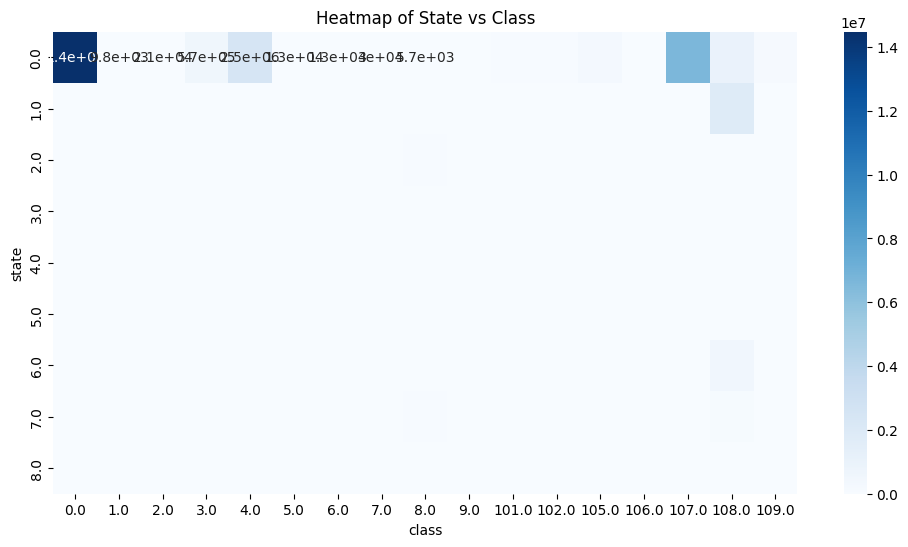

In [16]:
# Creating a crosstab
heatmap_data = pd.crosstab(index=r_df['state'], columns=r_df['class'])

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Heatmap of State vs Class')
plt.show()


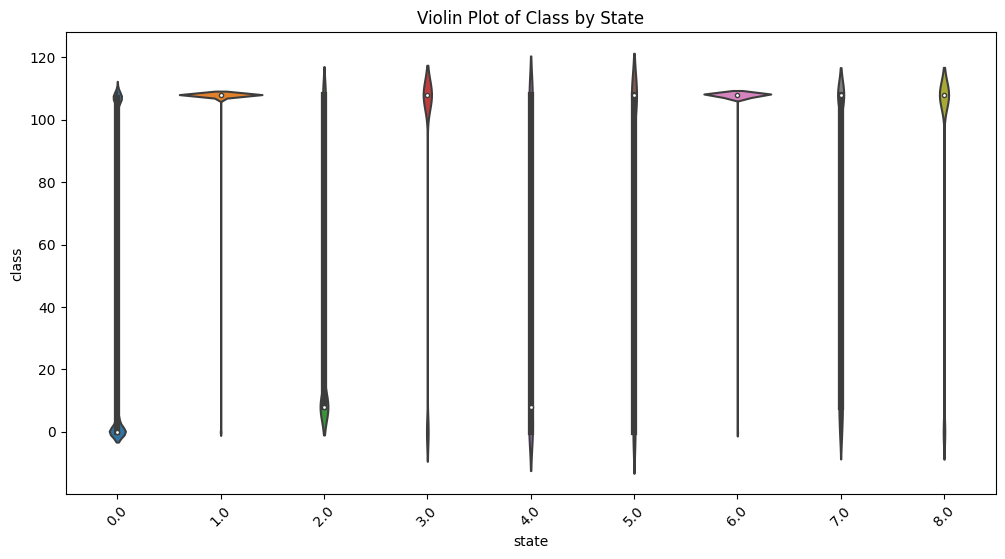

In [17]:
# Violin plot for visualizing class distribution per state
plt.figure(figsize=(12, 6))
sns.violinplot(x='state', y='class', data=r_df)
plt.title('Violin Plot of Class by State')
plt.xticks(rotation=45)
plt.show()


# Knowing more about the Wells (Real)

In [18]:
# Count of non-null values in the 'well' column
well_count = r_df["well"].count()
print(f"Non-null count of 'well' column: {well_count}")


Non-null count of 'well' column: 32872250


In [19]:
# Count of unique values in the 'well' column
unique_well_count = r_df["well"].nunique()
print(f"Number of unique values in 'well' column: {unique_well_count}")


Number of unique values in 'well' column: 40


In [20]:
# Display unique values in the 'well' column in sorted order
unique_wells = sorted(r_df["well"].unique())
print(f"Unique values in 'well' column (sorted): {unique_wells}")


Unique values in 'well' column (sorted): ['WELL-00001', 'WELL-00002', 'WELL-00003', 'WELL-00004', 'WELL-00005', 'WELL-00006', 'WELL-00007', 'WELL-00008', 'WELL-00009', 'WELL-00010', 'WELL-00011', 'WELL-00012', 'WELL-00013', 'WELL-00014', 'WELL-00015', 'WELL-00016', 'WELL-00019', 'WELL-00020', 'WELL-00021', 'WELL-00022', 'WELL-00023', 'WELL-00024', 'WELL-00025', 'WELL-00026', 'WELL-00027', 'WELL-00028', 'WELL-00029', 'WELL-00030', 'WELL-00031', 'WELL-00032', 'WELL-00033', 'WELL-00034', 'WELL-00035', 'WELL-00036', 'WELL-00037', 'WELL-00038', 'WELL-00039', 'WELL-00040', 'WELL-00041', 'WELL-00042']


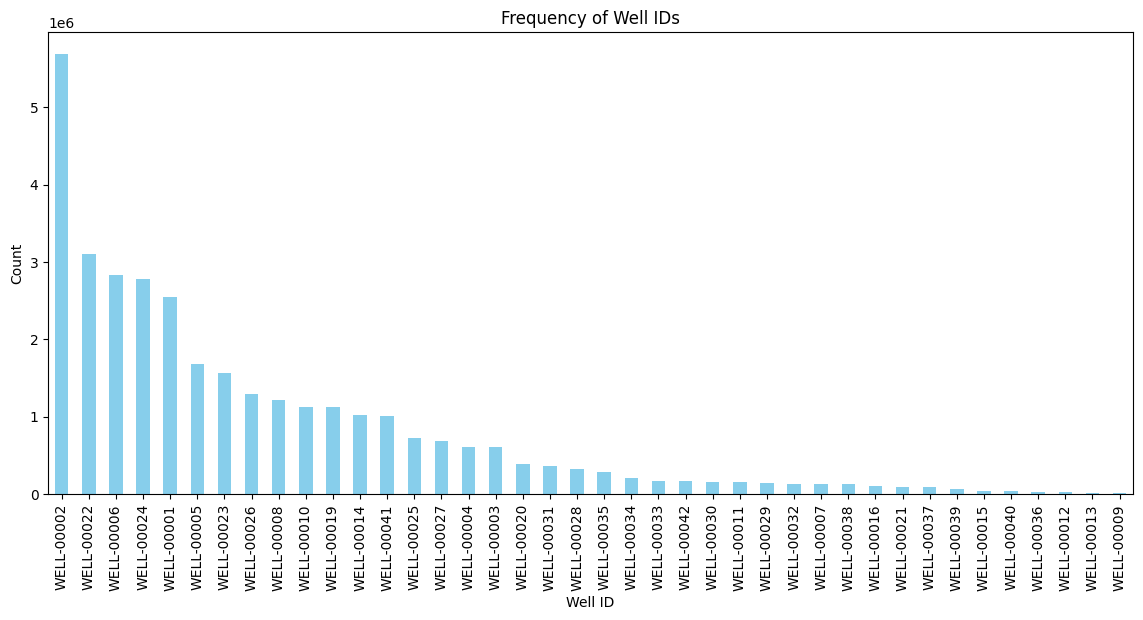

In [21]:
import matplotlib.pyplot as plt

# Assuming r_df dataframe is already defined and has a 'well' column

# Creating the histogram to see repetitions of well IDs
plt.figure(figsize=(14, 6))
r_df['well'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Well IDs')
plt.xlabel('Well ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [22]:
# Calculating the percentage occurrence of each well ID
well_percentage = r_df['well'].value_counts(normalize=True) * 100

# Creating a dataframe to display the percentages
well_percentage_df = well_percentage.reset_index()
well_percentage_df.columns = ['Well ID', 'Percentage (%)']

# Displaying the percentage occurrence dataframe
print(well_percentage_df)



       Well ID  Percentage (%)
0   WELL-00002       17.298871
1   WELL-00022        9.440105
2   WELL-00006        8.623197
3   WELL-00024        8.459117
4   WELL-00001        7.761893
5   WELL-00005        5.109282
6   WELL-00023        4.748169
7   WELL-00026        3.940719
8   WELL-00008        3.691022
9   WELL-00010        3.436221
10  WELL-00019        3.417396
11  WELL-00014        3.097561
12  WELL-00041        3.077164
13  WELL-00025        2.196966
14  WELL-00027        2.069892
15  WELL-00004        1.855629
16  WELL-00003        1.834502
17  WELL-00020        1.176813
18  WELL-00031        1.102848
19  WELL-00028        0.989829
20  WELL-00035        0.857200
21  WELL-00034        0.632564
22  WELL-00033        0.514480
23  WELL-00042        0.496613
24  WELL-00030        0.491411
25  WELL-00011        0.485893
26  WELL-00029        0.447873
27  WELL-00032        0.408253
28  WELL-00007        0.393101
29  WELL-00038        0.388507
30  WELL-00016        0.335103
31  WELL

# Knowing more about the id (Real)

In [23]:
# Checking if the 'id' column is a unique identifier
total_rows = len(r_df)
unique_ids = r_df['id'].nunique()
duplicates = r_df['id'].duplicated().sum()

# Printing the results
print(f"Total rows: {total_rows}")
print(f"Unique IDs: {unique_ids}")
print(f"Number of duplicate IDs: {duplicates}")

# Verify if 'id' is a unique identifier
if unique_ids == total_rows:
    print("The 'id' column is a unique identifier with no repeated values.")
else:
    print("The 'id' column is NOT a unique identifier. There are repeated values.")


Total rows: 32872250
Unique IDs: 1113
Number of duplicate IDs: 32871137
The 'id' column is NOT a unique identifier. There are repeated values.


In [24]:
# Checking for duplicate rows in the entire dataframe
duplicate_rows = r_df[r_df.duplicated(keep=False)]

# Displaying the count of duplicate rows
duplicate_count = duplicate_rows.shape[0]

print(f"Total number of duplicate rows: {duplicate_count}")

# Displaying the duplicate rows (if any)
if duplicate_count > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the dataframe.")


Total number of duplicate rows: 0
No duplicate rows found in the dataframe.


In [25]:
# Assuming r_df is defined and has an 'id' column
id_description = r_df['id'].describe()

# Print the description of the 'id' column
print("Summary statistics for the 'id' column:")
print(id_description)


Summary statistics for the 'id' column:
count    3.287225e+07
mean     2.017152e+13
std      1.795104e+10
min      2.011083e+13
25%      2.017021e+13
50%      2.017063e+13
75%      2.018083e+13
max      2.023092e+13
Name: id, dtype: float64


In [26]:
# Finding the top 10 most repetitive IDs and their counts
most_repeated_ids = r_df['id'].value_counts().head(10)

# Displaying the top 10 most repetitive IDs along with their counts
print("Top 10 Most Repetitive IDs and Their Counts:")
print(most_repeated_ids)


Top 10 Most Repetitive IDs and Their Counts:
id
20180925003447    768314
20200629194141    722192
20230918170106    680420
20170207230000    586201
20180912025800    561721
20180826212652    559989
20170608230000    522001
20181026005827    487883
20181019115124    486517
20160712123044    398146
Name: count, dtype: int64


In [27]:
# Check the data type of 'id' column
print(f"Data type of 'id' column: {r_df['id'].dtype}")

# Convert the 'id' column to a string format and strip whitespace if necessary
r_df['id'] = r_df['id'].astype(str).str.strip()


Data type of 'id' column: int64


In [28]:
# Display a sample of rows for the most repeated ID
most_repeated_id_sample = r_df[r_df['id'] == '20180925003447'].head(5)
print(most_repeated_id_sample)


                    timestamp  label        well              id  ABER-CKGL  \
22204457  2018-09-25 00:34:47      7  WELL-00022  20180925003447        0.0   
22204458  2018-09-25 00:34:48      7  WELL-00022  20180925003447        0.0   
22204459  2018-09-25 00:34:49      7  WELL-00022  20180925003447        0.0   
22204460  2018-09-25 00:34:50      7  WELL-00022  20180925003447        0.0   
22204461  2018-09-25 00:34:51      7  WELL-00022  20180925003447        0.0   

          ABER-CKP  ESTADO-DHSV  ESTADO-M1  ESTADO-M2  ESTADO-PXO  \
22204457  44.00027          1.0        1.0        0.0         0.0   
22204458  44.00026          1.0        1.0        0.0         0.0   
22204459  44.00025          1.0        1.0        0.0         0.0   
22204460  44.00024          1.0        1.0        0.0         0.0   
22204461  44.00023          1.0        1.0        0.0         0.0   

          ESTADO-SDV-GL  ESTADO-SDV-P  ESTADO-W1  ESTADO-W2  ESTADO-XO  \
22204457            NaN           1.

In [29]:
# Filter rows for the most repetitive ID (e.g., '20180925003447')
repetitive_id_sample = r_df[r_df['id'] == '20180925003447']

# Display the sample rows for this ID
print("Sample rows for ID '20180925003447':")
print(repetitive_id_sample.head(10))  # Show the first 10 rows

# Describe the characteristics of the repetitive ID
repetitive_id_summary = repetitive_id_sample.describe(include='all')
print("\nSummary statistics for the ID '20180925003447':")
print(repetitive_id_summary)


Sample rows for ID '20180925003447':
                    timestamp  label        well              id  ABER-CKGL  \
22204457  2018-09-25 00:34:47      7  WELL-00022  20180925003447        0.0   
22204458  2018-09-25 00:34:48      7  WELL-00022  20180925003447        0.0   
22204459  2018-09-25 00:34:49      7  WELL-00022  20180925003447        0.0   
22204460  2018-09-25 00:34:50      7  WELL-00022  20180925003447        0.0   
22204461  2018-09-25 00:34:51      7  WELL-00022  20180925003447        0.0   
22204462  2018-09-25 00:34:52      7  WELL-00022  20180925003447        0.0   
22204463  2018-09-25 00:34:53      7  WELL-00022  20180925003447        0.0   
22204464  2018-09-25 00:34:54      7  WELL-00022  20180925003447        0.0   
22204465  2018-09-25 00:34:55      7  WELL-00022  20180925003447        0.0   
22204466  2018-09-25 00:34:56      7  WELL-00022  20180925003447        0.0   

          ABER-CKP  ESTADO-DHSV  ESTADO-M1  ESTADO-M2  ESTADO-PXO  \
22204457  44.00027      

In [30]:
# Assuming r_df is defined and has the 'id' and 'timestamp' columns

# Filter the dataframe for the specific ID '20180925003447'
id_sample = r_df[r_df['id'] == '20180925003447']

# Analyzing the 'timestamp' column for this ID
timestamp_analysis = id_sample['timestamp'].describe()

# Display the summary statistics for the timestamp column
print("Timestamp Analysis for ID '20180925003447':")
print(timestamp_analysis)


Timestamp Analysis for ID '20180925003447':
count                  768314
unique                 768314
top       2018-09-25 00:34:47
freq                        1
Name: timestamp, dtype: object


In [31]:
id_existence_check = r_df['id'].isin(['20180925003447']).sum()
print(f"Number of rows with ID '20180925003447': {id_existence_check}")


Number of rows with ID '20180925003447': 768314


Are all timestamps unique for ID '20180925003447'? True


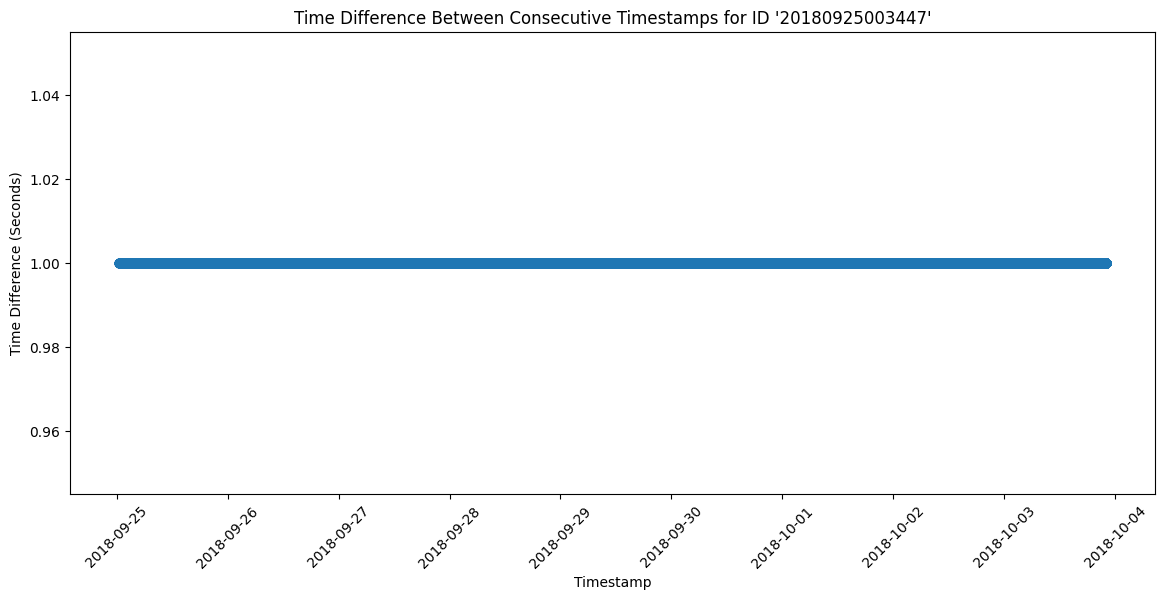

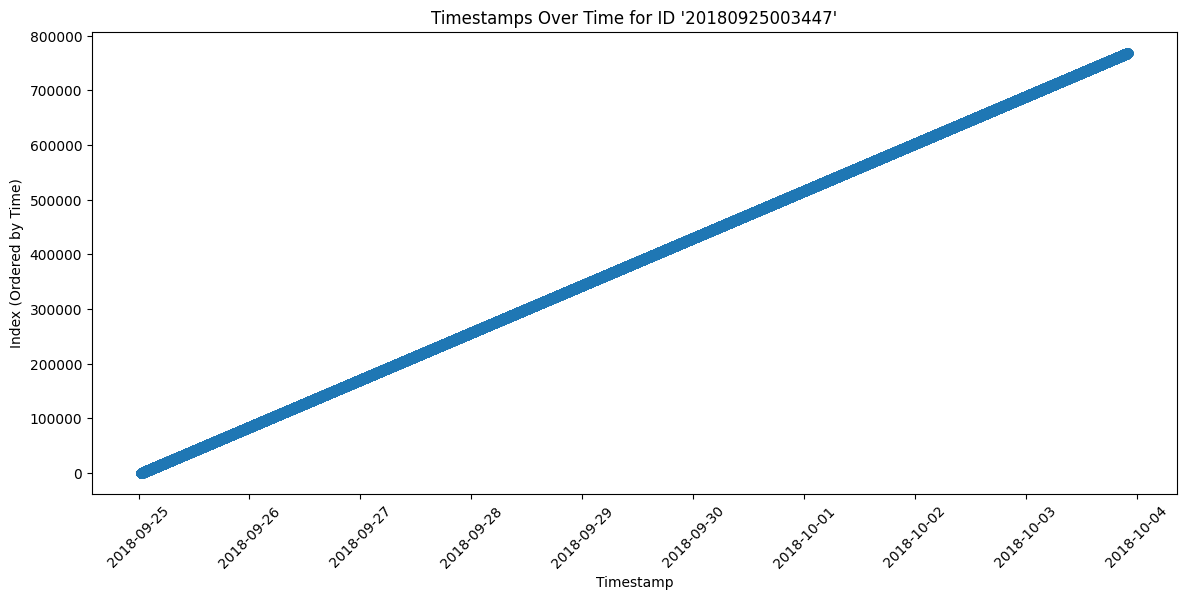

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtering the dataframe for the specific ID '20180925003447'
id_sample = r_df[r_df['id'] == '20180925003447'].copy()

# Converting 'timestamp' to datetime format
id_sample['timestamp'] = pd.to_datetime(id_sample['timestamp'])

# Step 1: Check if timestamps are unique
unique_timestamps = id_sample['timestamp'].is_unique
print(f"Are all timestamps unique for ID '20180925003447'? {unique_timestamps}")

# Step 2: Calculate time differences to check continuity
id_sample = id_sample.sort_values(by='timestamp')  # Ensure timestamps are in order
id_sample['time_diff'] = id_sample['timestamp'].diff().dt.total_seconds()

# Step 3: Visualize the time differences
plt.figure(figsize=(14, 6))
plt.plot(id_sample['timestamp'], id_sample['time_diff'], marker='o', linestyle='-')
plt.title("Time Difference Between Consecutive Timestamps for ID '20180925003447'")
plt.xlabel("Timestamp")
plt.ylabel("Time Difference (Seconds)")
plt.xticks(rotation=45)
plt.show()

# Step 4: Visualize the timestamps as a time series
plt.figure(figsize=(14, 6))
plt.plot(id_sample['timestamp'], range(len(id_sample)), marker='o', linestyle='-')
plt.title("Timestamps Over Time for ID '20180925003447'")
plt.xlabel("Timestamp")
plt.ylabel("Index (Ordered by Time)")
plt.xticks(rotation=45)
plt.show()


# Most repeatitive instance 20180925003447

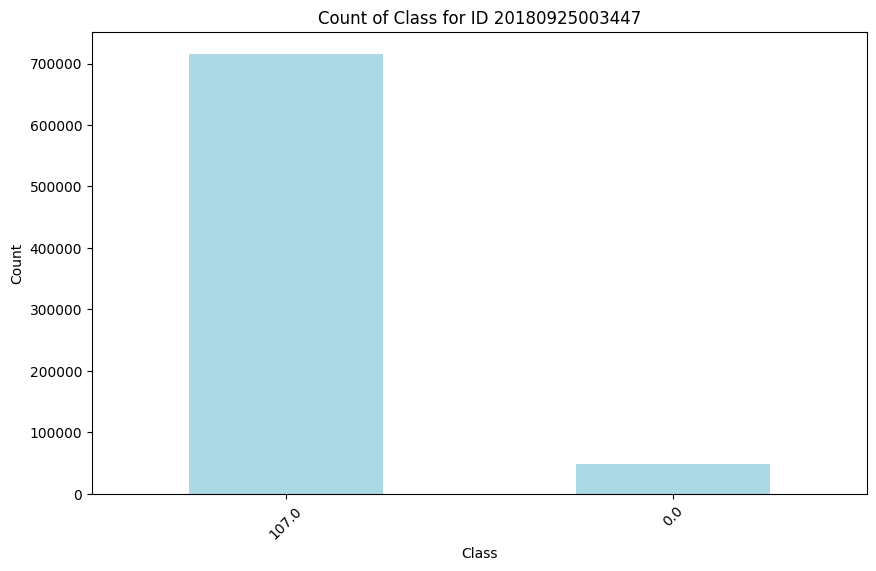

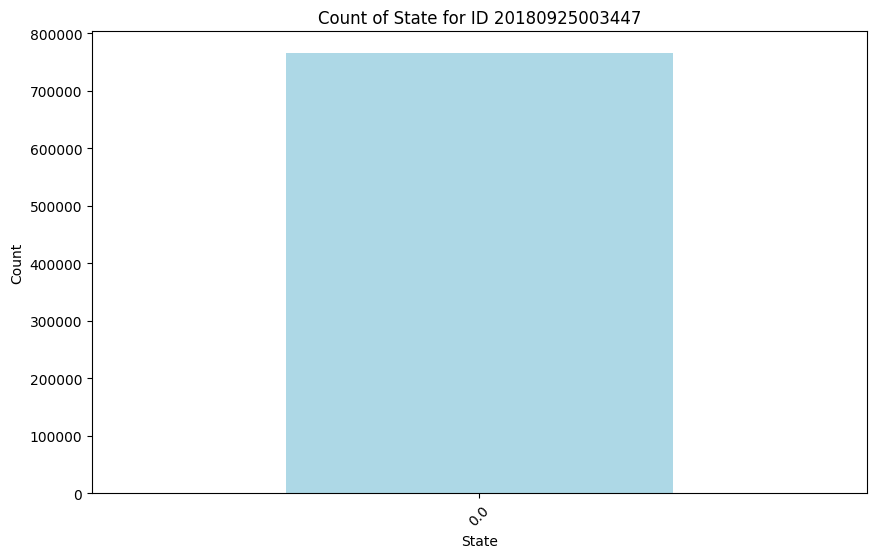

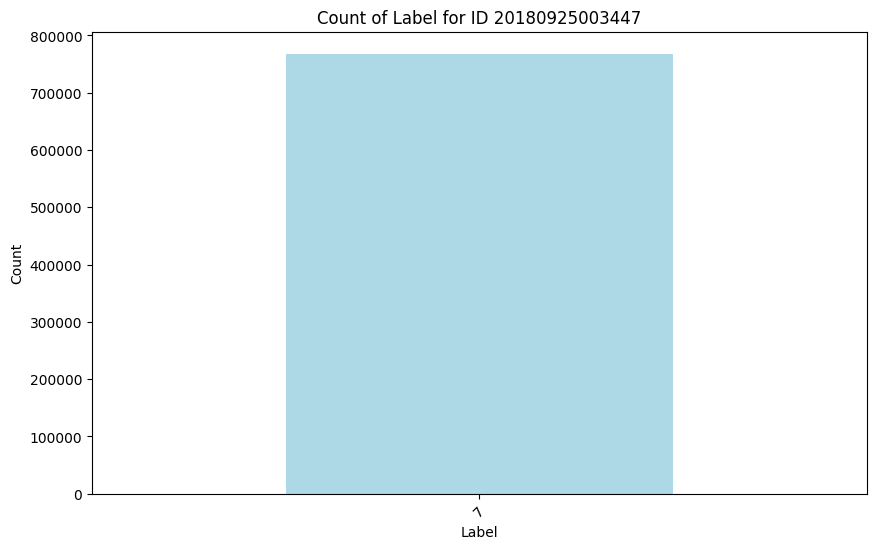

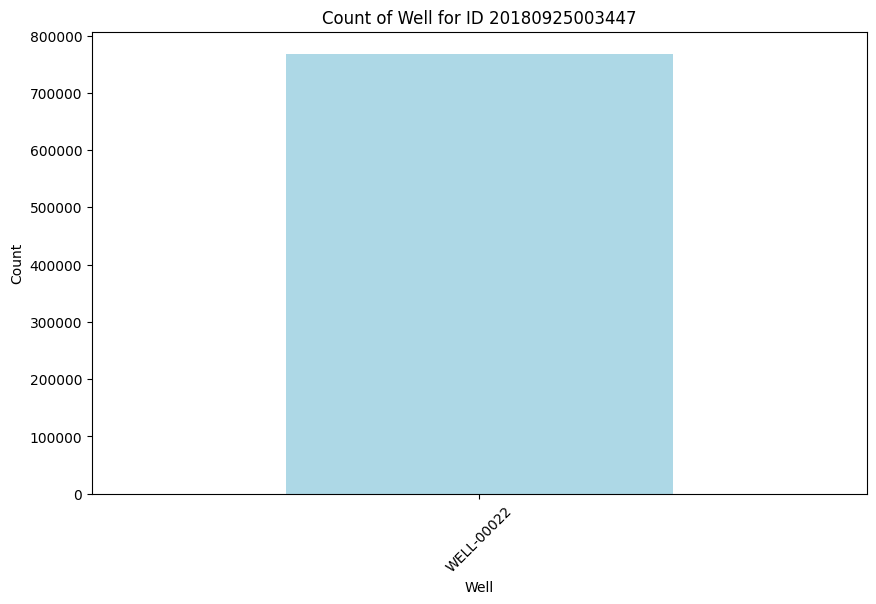

In [33]:
import matplotlib.pyplot as plt

# Filtering the dataframe for the specific ID '20180925003447'
id_sample = r_df[r_df['id'] == '20180925003447']

# Defining the columns to analyze
columns_to_analyze = ['class', 'state', 'label', 'well']

# Creating bar plots for the count of unique values in each specified column
for col in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    id_sample[col].value_counts().plot(kind='bar', color='lightblue')
    plt.title(f'Count of {col.capitalize()} for ID 20180925003447')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# Checking if id = well

In [34]:
# Count the occurrences of 'WELL-00022' in the 'well' column
well_22_count = r_df['well'].value_counts().get('WELL-00022', 0)

# Display the count of 'WELL-00022'
print(f"The well 'WELL-00022' appears {well_22_count} times in the dataframe.")


The well 'WELL-00022' appears 3103175 times in the dataframe.


In [35]:
# Count occurrences where id == '20180925003447' and well == 'WELL-00022'
well_22_count_specific_id = r_df[(r_df['id'] == '20180925003447') & (r_df['well'] == 'WELL-00022')].shape[0]

# Displaying the count
print(f"The well 'WELL-00022' appears {well_22_count_specific_id} times for the ID '20180925003447' in the dataframe.")


The well 'WELL-00022' appears 768314 times for the ID '20180925003447' in the dataframe.


In [36]:
# Group by 'id' and calculate the number of unique wells for each ID
well_per_id = r_df.groupby('id')['well'].nunique()

# Separate IDs that have only one well and those with multiple wells
single_well_ids = well_per_id[well_per_id == 1]
multiple_well_ids = well_per_id[well_per_id > 1]

# Display the counts and a few sample IDs
print(f"Total IDs: {len(well_per_id)}")
print(f"IDs with a single well: {len(single_well_ids)}")
print(f"IDs with multiple wells: {len(multiple_well_ids)}")

# Displaying a few IDs with multiple wells
print("Sample of IDs with multiple wells and their well counts:")
print(multiple_well_ids.head(10))


Total IDs: 1113
IDs with a single well: 1107
IDs with multiple wells: 6
Sample of IDs with multiple wells and their well counts:
id
20170812130000    2
20170813040000    2
20170815100000    2
20170816010000    2
20170816160000    2
20170817070000    2
Name: well, dtype: int64


In [37]:
# List of IDs with multiple wells
multiple_well_ids_list = ['20170812130000', '20170813040000', 
                          '20170815100000', '20170816010000', 
                          '20170816160000', '20170817070000']

# Filtering rows for the specified IDs
multiple_well_ids_sample = r_df[r_df['id'].isin(multiple_well_ids_list)]

# Grouping by 'id' and getting the unique well names for each ID
well_details = multiple_well_ids_sample.groupby('id')['well'].unique().reset_index()
well_details.columns = ['ID', 'Wells']

# Displaying the result
print("Well Names for Each ID Having Multiple Wells:")
print(well_details)


Well Names for Each ID Having Multiple Wells:
               ID                     Wells
0  20170812130000  [WELL-00005, WELL-00002]
1  20170813040000  [WELL-00002, WELL-00005]
2  20170815100000  [WELL-00006, WELL-00005]
3  20170816010000  [WELL-00005, WELL-00006]
4  20170816160000  [WELL-00005, WELL-00006]
5  20170817070000  [WELL-00006, WELL-00005]


# 2nd Most repeatitive instance 20200629194141 

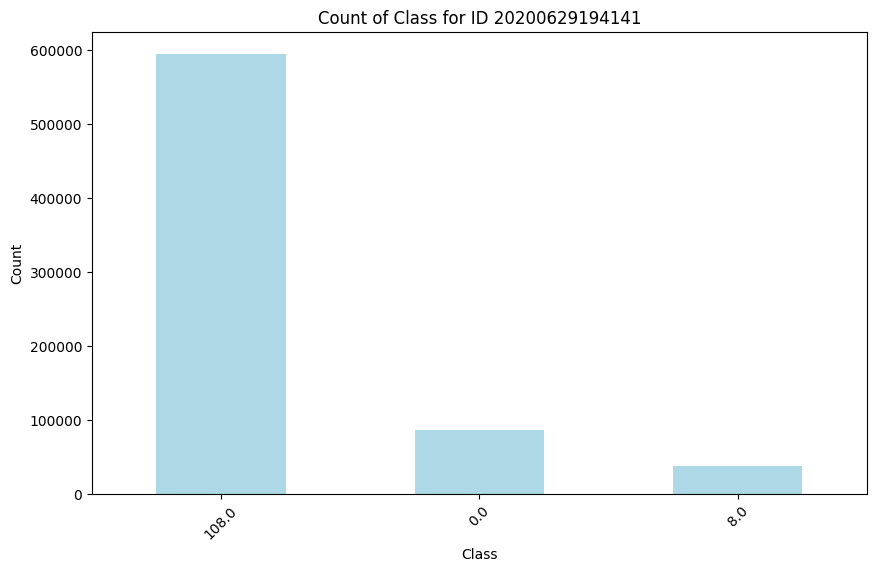

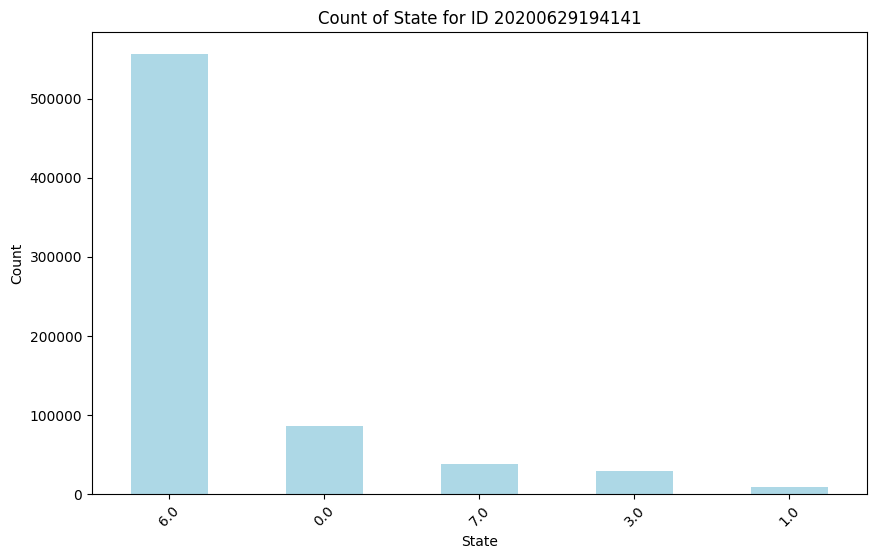

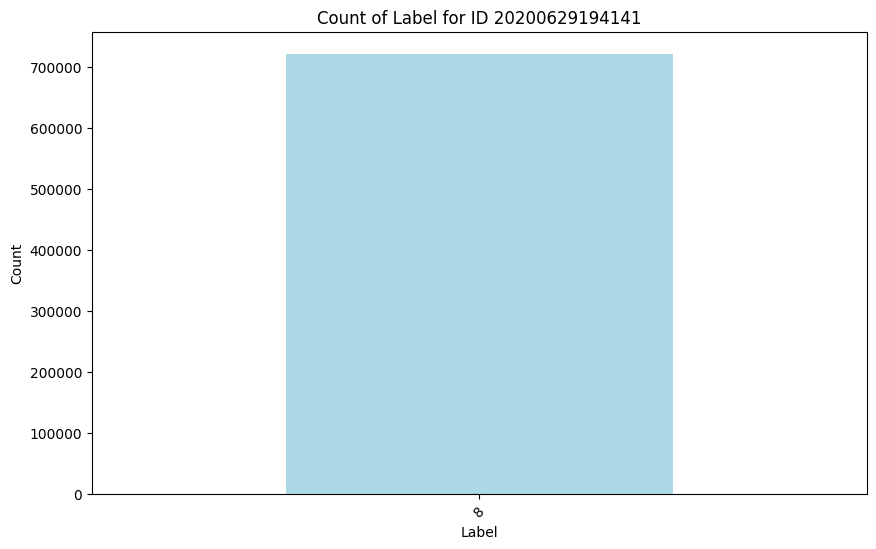

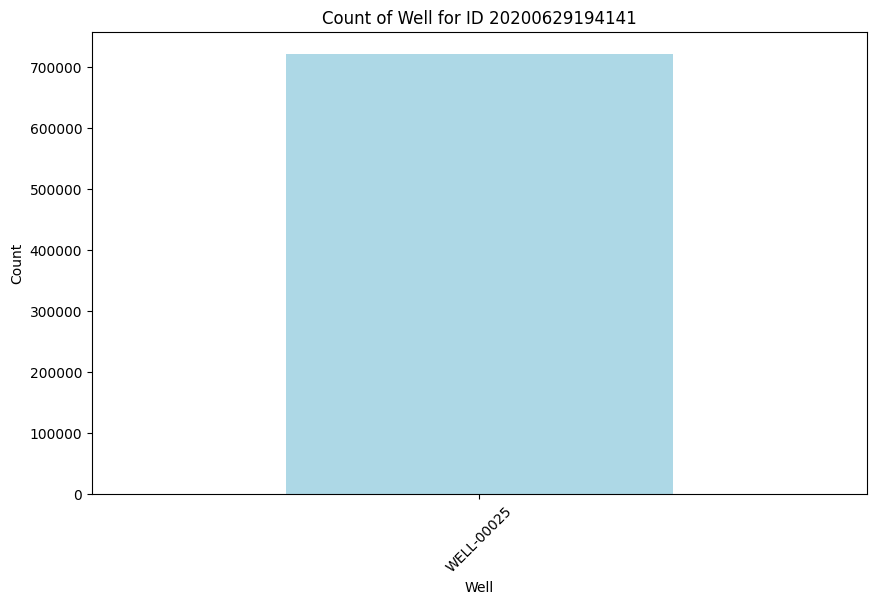

In [38]:
import matplotlib.pyplot as plt

# Filtering the dataframe for the specific ID '20200629194141'
id_sample = r_df[r_df['id'] == '20200629194141']

# Defining the columns to analyze
columns_to_analyze = ['class', 'state', 'label', 'well']

# Creating bar plots for the count of unique values in each specified column
for col in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    id_sample[col].value_counts().plot(kind='bar', color='lightblue')
    plt.title(f'Count of {col.capitalize()} for ID 20200629194141')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# 3rd Most repeatitive instance 20200629194141 

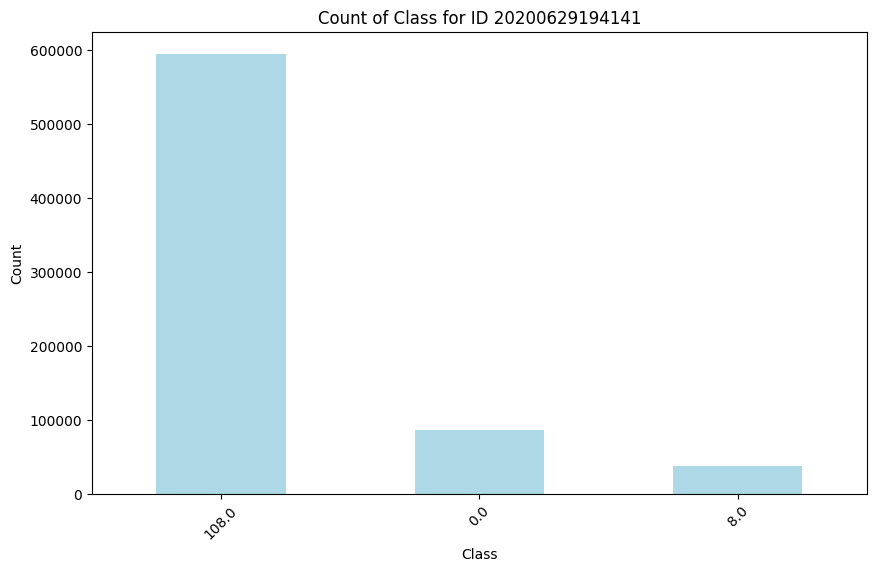

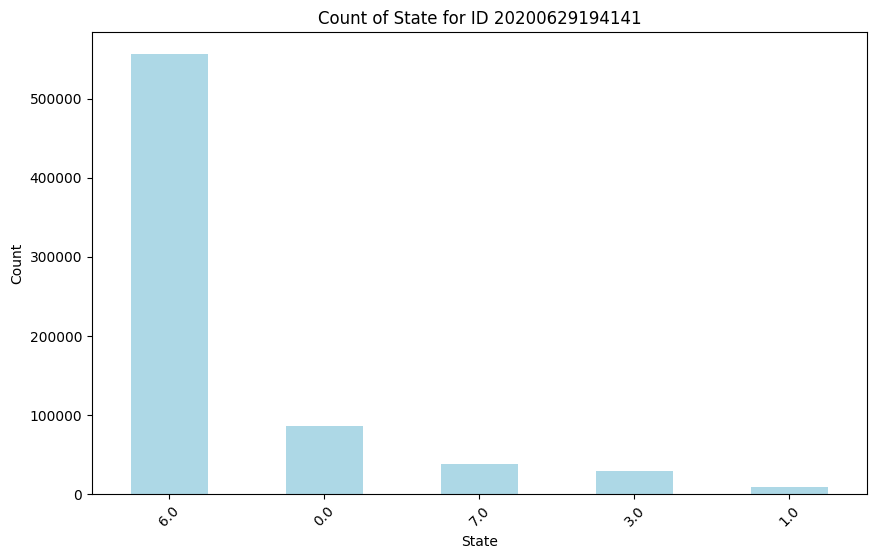

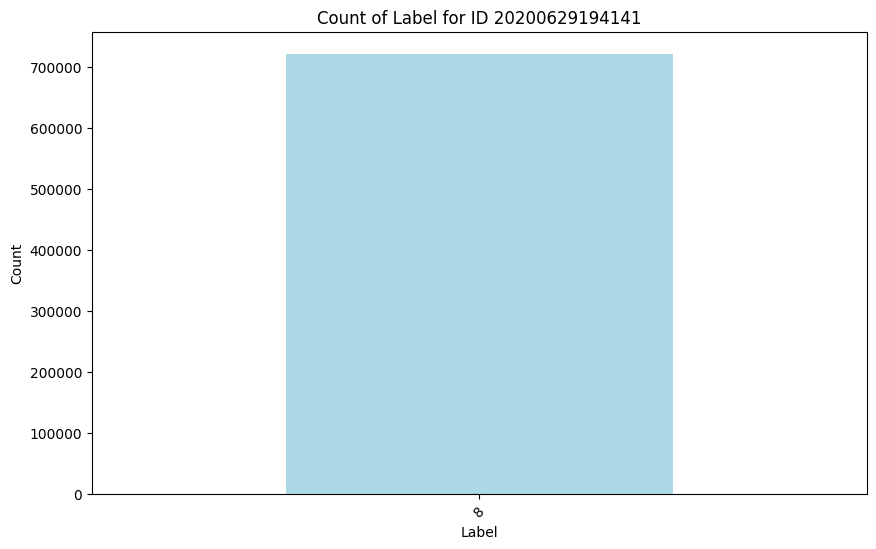

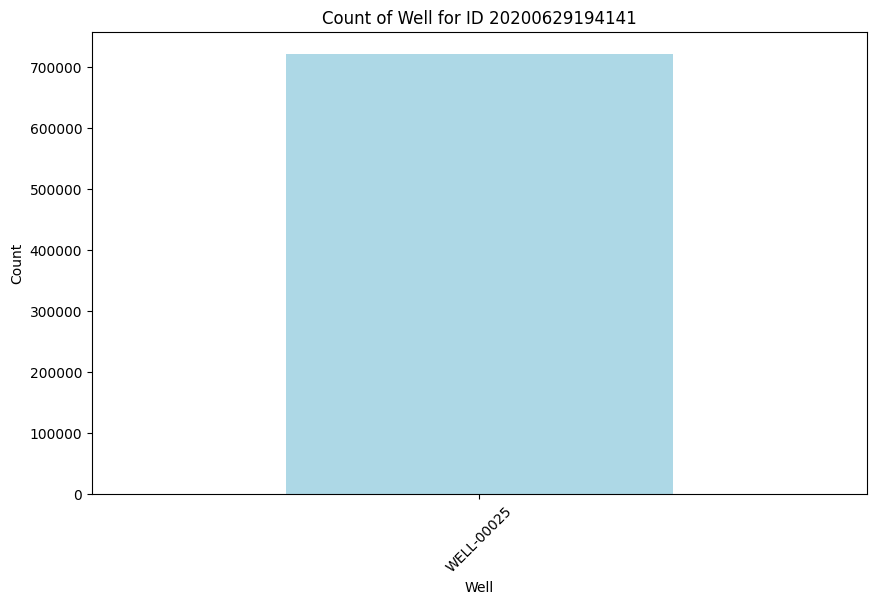

In [39]:
import matplotlib.pyplot as plt

# Filtering the dataframe for the specific ID '20200629194141'
id_sample = r_df[r_df['id'] == '20200629194141']

# Defining the columns to analyze
columns_to_analyze = ['class', 'state', 'label', 'well']

# Creating bar plots for the count of unique values in each specified column
for col in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    id_sample[col].value_counts().plot(kind='bar', color='lightblue')
    plt.title(f'Count of {col.capitalize()} for ID 20200629194141')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Analyze Label

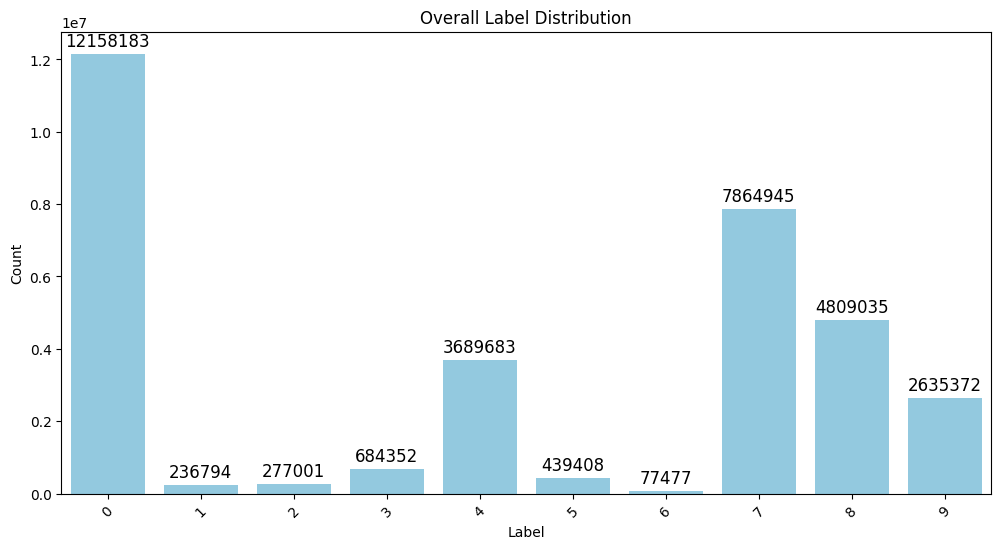

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming r_df is defined and has a 'label' column

# Step 1: Calculate the overall frequency distribution of labels
label_distribution = r_df['label'].value_counts()

# Plotting the overall label distribution using a single color for the bars
plt.figure(figsize=(12, 6))
bar_plot = sns.countplot(x='label', data=r_df, color='skyblue')
plt.title('Overall Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding data labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black')

# Display the plot
plt.show()



In [41]:
# Checking for missing values in the 'label' column
missing_labels_count = r_df['label'].isnull().sum()

# Display the number of missing values
print(f"Number of missing values in the 'label' column: {missing_labels_count}")


Number of missing values in the 'label' column: 0


# Timestamp?

In [42]:
r_df['timestamp'].head()


0    2014-12-17 14:27:45
1    2014-12-17 14:27:46
2    2014-12-17 14:27:47
3    2014-12-17 14:27:48
4    2014-12-17 14:27:49
Name: timestamp, dtype: object

In [43]:
r_df['timestamp'].dtype


dtype('O')

In [44]:
r_df['timestamp'].unique()


array(['2014-12-17 14:27:45', '2014-12-17 14:27:46',
       '2014-12-17 14:27:47', ..., '2014-03-20 04:20:36',
       '2014-03-20 04:20:37', '2014-03-20 04:20:38'], dtype=object)

In [45]:
r_df['timestamp'].value_counts()


timestamp
2019-09-24 21:59:14    6
2019-09-24 21:50:33    6
2019-09-24 21:50:31    6
2019-09-24 21:50:30    6
2019-09-24 21:50:29    6
                      ..
2016-08-11 04:07:22    1
2016-08-11 04:07:21    1
2016-08-11 04:07:20    1
2016-08-11 04:07:19    1
2014-03-20 04:20:38    1
Name: count, Length: 24910943, dtype: int64

In [47]:
print("Minimum Timestamp: ", r_df['timestamp'].min())
print("Maximum Timestamp: ", r_df['timestamp'].max())


Minimum Timestamp:  2011-08-30 23:53:21
Maximum Timestamp:  2023-09-26 14:01:25


In [49]:
timestamp_counts = r_df['timestamp'].value_counts()
timestamp_counts_df = timestamp_counts.reset_index()
timestamp_counts_df.columns = ['timestamp', 'frequency']


In [50]:
repeated_timestamps = timestamp_counts_df[timestamp_counts_df['frequency'] > 1]


In [51]:
repeated_timestamps_sorted = repeated_timestamps.sort_values(by='frequency', ascending=False)
print(repeated_timestamps_sorted.head(10))  # Top 10 most repeated timestamps


                timestamp  frequency
0     2019-09-24 21:59:14          6
2364  2019-09-24 22:03:36          6
2394  2019-09-24 21:59:37          6
2395  2019-09-24 21:59:36          6
2396  2019-09-24 21:59:35          6
2397  2019-09-24 21:59:34          6
2398  2019-09-24 21:59:33          6
2399  2019-09-24 21:59:32          6
2400  2019-09-24 21:59:31          6
2401  2019-09-24 21:59:30          6


In [53]:
# Check for all repeated timestamps
repeated_values_check = timestamp_counts_df[timestamp_counts_df['frequency'] > 1]

# Display all repeated values (if any)
print("Total Repeated Timestamps: ", repeated_values_check.shape[0])
print(repeated_values_check)


Total Repeated Timestamps:  5902885
                   timestamp  frequency
0        2019-09-24 21:59:14          6
1        2019-09-24 21:50:33          6
2        2019-09-24 21:50:31          6
3        2019-09-24 21:50:30          6
4        2019-09-24 21:50:29          6
...                      ...        ...
5902880  2021-06-18 15:14:15          2
5902881  2021-06-18 15:14:13          2
5902882  2021-06-18 15:14:12          2
5902883  2021-06-18 15:14:11          2
5902884  2021-06-18 15:14:10          2

[5902885 rows x 2 columns]


# How they are related? timestamp, label, id, well & state
 

In [62]:
# Display unique counts for each column
print("Unique value counts:")
print(r_df[['timestamp', 'label', 'id', 'well', 'state']].nunique())

# Check for missing values
print("\nMissing value counts:")
print(r_df[['timestamp', 'label', 'id', 'well', 'state']].isnull().sum())


 

Unique value counts:
timestamp    24910943
label              10
id               1113
well               40
state               9
dtype: int64

Missing value counts:
timestamp          0
label              0
id                 0
well               0
state        4028400
dtype: int64


In [63]:
# Group by the relevant columns and count occurrences
repetitive_combinations = r_df.groupby(['timestamp', 'label', 'id', 'well', 'state']).size().reset_index(name='count')

# Display the top 10 most repeated combinations
print("Top repeated combinations of variables:\n", repetitive_combinations.sort_values(by='count', ascending=False).head(10))


Top repeated combinations of variables:
                     timestamp  label              id        well  state  count
0         2011-08-31 00:53:21      8  20110830235321  WELL-00032    0.0      1
19229229  2018-04-24 19:47:26      4  20180424170033  WELL-00010    0.0      1
19229240  2018-04-24 19:47:37      4  20180424170033  WELL-00010    0.0      1
19229239  2018-04-24 19:47:36      4  20180424170033  WELL-00010    0.0      1
19229238  2018-04-24 19:47:35      4  20180424170033  WELL-00010    0.0      1
19229237  2018-04-24 19:47:34      4  20180424170033  WELL-00010    0.0      1
19229236  2018-04-24 19:47:33      4  20180424170033  WELL-00010    0.0      1
19229235  2018-04-24 19:47:32      4  20180424170033  WELL-00010    0.0      1
19229234  2018-04-24 19:47:31      4  20180424170033  WELL-00010    0.0      1
19229233  2018-04-24 19:47:30      4  20180424170033  WELL-00010    0.0      1


In [64]:
# Encode categorical variables
r_df_encoded = r_df.copy()
r_df_encoded['label'] = r_df_encoded['label'].astype('category').cat.codes
r_df_encoded['id'] = r_df_encoded['id'].astype('category').cat.codes
r_df_encoded['well'] = r_df_encoded['well'].astype('category').cat.codes
r_df_encoded['state'] = r_df_encoded['state'].astype('category').cat.codes

# Calculate the correlation matrix for encoded variables
correlation_matrix = r_df_encoded[['label', 'id', 'well', 'state']].corr()

print("\nCorrelation Matrix with 'state':")
print(correlation_matrix)



Correlation Matrix with 'state':
          label        id      well     state
label  1.000000  0.245391  0.867884  0.259455
id     0.245391  1.000000  0.324801  0.113449
well   0.867884  0.324801  1.000000  0.242198
state  0.259455  0.113449  0.242198  1.000000


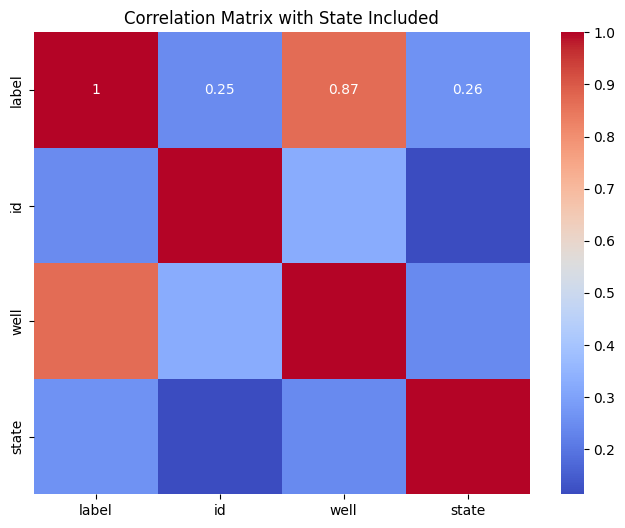

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with State Included')
plt.show()


In [66]:
# Group by state and other variables to check for repetitive values
state_patterns = r_df.groupby(['state', 'label', 'id', 'well']).size().reset_index(name='count')

# Display the top 10 repeated patterns for state
print("Top state-based repetitive patterns:\n", state_patterns.sort_values(by='count', ascending=False).head(10))


Top state-based repetitive patterns:
       state  label              id        well   count
1039    0.0      7  20180925003447  WELL-00022  764714
1130    1.0      8  20230918170106  WELL-00027  598223
1055    0.0      8  20170207230000  WELL-00026  582601
1037    0.0      7  20180912025800  WELL-00022  558121
1036    0.0      7  20180826212652  WELL-00023  556389
1147    6.0      8  20200629194141  WELL-00025  556097
1056    0.0      8  20170608230000  WELL-00026  518401
1044    0.0      7  20181026005827  WELL-00022  484283
1042    0.0      7  20181019115124  WELL-00023  482917
1014    0.0      7  20160712123044  WELL-00024  394546


# ESTADO-XO: State of the XO (crossover) valve [0, 0.5, or 1];

In [60]:
r_df['ESTADO-XO'].value_counts()


ESTADO-XO
0.0    18481338
1.0       57392
Name: count, dtype: int64

In [55]:
# Check for null values in the 'ESTADO-XO' column
null_count = r_df['ESTADO-XO'].isnull().sum()

print(f"Number of null values in 'ESTADO-XO': {null_count}")


Number of null values in 'ESTADO-XO': 14333520


In [58]:
# Calculate the total count (excluding null values)
total_count = r_df['ESTADO-XO'].count()
print(f"Total count of 'ESTADO-XO' (excluding nulls): {total_count}")



Total count of 'ESTADO-XO' (excluding nulls): 18538730


In [59]:
total_rows = r_df.shape[0]
print(f"Total rows in the dataset: {total_rows}")


Total rows in the dataset: 32872250


# Exploring Class 


Unique values in the 'class' column:
[ nan   0. 109.   9. 107.   7. 106.   6. 101.   1. 108.   8.   4.   3.
 102.   2. 105.   5.]

Class distribution:
class
0.0      14570142
107.0     6670582
108.0     3655418
4.0       2454883
3.0        569152
105.0      320672
109.0      195443
8.0        140920
102.0       89091
101.0       65340
7.0         30339
2.0         21274
9.0         17752
6.0         13285
5.0         13205
1.0          9783
106.0        6569
Name: count, dtype: int64


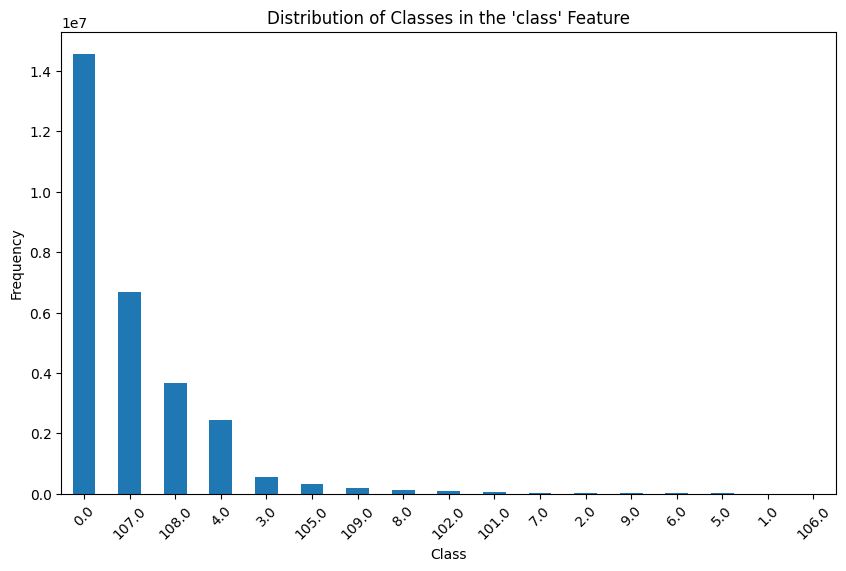

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Unique values in the 'class' column
unique_classes = r_df['class'].unique()
print("\nUnique values in the 'class' column:")
print(unique_classes)

# Distribution of the classes
class_distribution = r_df['class'].value_counts()
print("\nClass distribution:")
print(class_distribution)

# Visualize the distribution of classes using a bar plot
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title("Distribution of Classes in the 'class' Feature")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [7]:
# Total number of rows in the dataframe
total_rows = r_df.shape[0]
print(f"Total number of rows: {total_rows}")

# Count of null values in the 'class' column
null_count = r_df['class'].isnull().sum()
print(f"Number of null values in the 'class' feature: {null_count}")


Total number of rows: 32872250
Number of null values in the 'class' feature: 4028400


In [9]:
# Calculate percentage of null values in the 'class' feature
null_percentage_class = (r_df['class'].isnull().sum() / r_df.shape[0]) * 100
print(f"Percentage of null values in the 'class' feature: {null_percentage_class:.2f}%")


Percentage of null values in the 'class' feature: 12.25%


In [11]:
# Calculate class count and percentage
class_count = r_df['class'].value_counts()
class_percentage = r_df['class'].value_counts(normalize=True) * 100

# Create a DataFrame to display the results
class_summary = pd.DataFrame({'Class': class_count.index, 
                              'Class Count': class_count.values, 
                              'Class Percentage (%)': class_percentage.values})

# Display the DataFrame
print(class_summary)


    Class  Class Count  Class Percentage (%)
0     0.0     14570142             50.513860
1   107.0      6670582             23.126531
2   108.0      3655418             12.673128
3     4.0      2454883              8.510941
4     3.0       569152              1.973218
5   105.0       320672              1.111752
6   109.0       195443              0.677590
7     8.0       140920              0.488562
8   102.0        89091              0.308873
9   101.0        65340              0.226530
10    7.0        30339              0.105184
11    2.0        21274              0.073756
12    9.0        17752              0.061545
13    6.0        13285              0.046058
14    5.0        13205              0.045781
15    1.0         9783              0.033917
16  106.0         6569              0.022774



Variance of Each Feature:
  Feature       Variance
0    well     114.657749
1   label      12.524679
2      id  132610.097541
3   state       9.296448


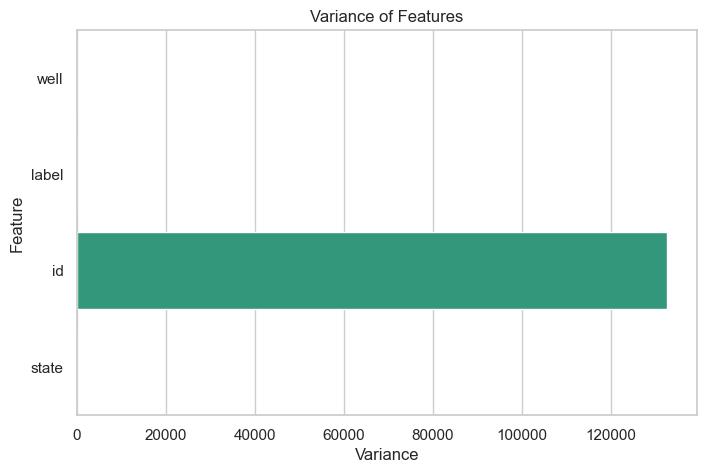

In [14]:
# Variance Analysis
    # Step 1: Variance Analysis for Selected Features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables for variance analysis
encoded_variance_df = r_df[['well', 'label', 'id', 'state']].copy()
encoder = LabelEncoder()
for col in ['well', 'label', 'id', 'state']:
    encoded_variance_df[col] = encoder.fit_transform(r_df[col].astype(str))

# Calculate variance for each encoded feature
variance_values = encoded_variance_df.var().reset_index()
variance_values.columns = ['Feature', 'Variance']

# Display variance values
print("\nVariance of Each Feature:")
print(variance_values)

# Plotting Variance
plt.figure(figsize=(8, 5))
sns.barplot(x='Variance', y='Feature', data=variance_values, palette='viridis')
plt.title('Variance of Features')
plt.show()



Correlation Matrix:
          class      well     label        id     state
class  1.000000 -0.046961  0.123240 -0.075388  0.762990
well  -0.046961  1.000000  0.867884  0.324801 -0.160767
label  0.123240  0.867884  1.000000  0.245391 -0.126844
id    -0.075388  0.324801  0.245391  1.000000 -0.049920
state  0.762990 -0.160767 -0.126844 -0.049920  1.000000


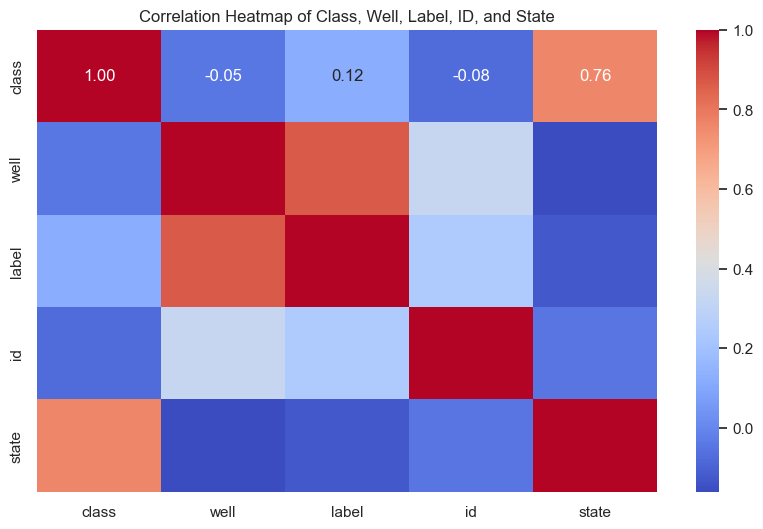

In [17]:
# Correlation Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables for correlation analysis
encoded_corr_df = r_df[['class', 'well', 'label', 'id', 'state']].copy()
encoder = LabelEncoder()
for col in ['class', 'well', 'label', 'id', 'state']:
    encoded_corr_df[col] = encoder.fit_transform(r_df[col].astype(str))

# Calculate the correlation matrix
correlation_matrix = encoded_corr_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plotting Correlation Heatmap with data labels
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 12})
plt.title('Correlation Heatmap of Class, Well, Label, ID, and State')
plt.show()



Feature Importances from RandomForest Classifier:
  Feature  Importance
1   label    0.393819
3   state    0.325613
0    well    0.205804
2      id    0.074764


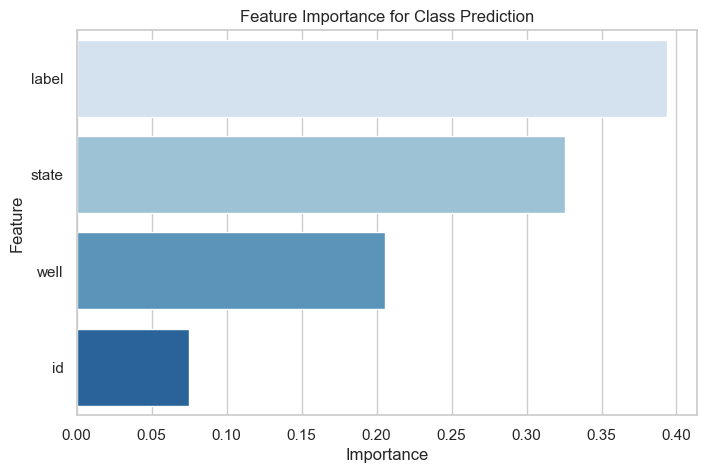

In [16]:
# Feature Importance Analysis Using RandomForest

# Step 3: Feature Importance Analysis for Selected Features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Encode categorical variables for feature importance analysis
encoded_importance_df = r_df[['class', 'well', 'label', 'id', 'state']].copy()
encoder = LabelEncoder()
for col in ['class', 'well', 'label', 'id', 'state']:
    encoded_importance_df[col] = encoder.fit_transform(r_df[col].astype(str))

# Separate features and target variable
X = encoded_importance_df.drop(columns=['class'])  # Features
y = encoded_importance_df['class']  # Target variable

# Train a RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importances from RandomForest Classifier:")
print(feature_importances)

# Plotting Feature Importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Blues')
plt.title('Feature Importance for Class Prediction')
plt.show()


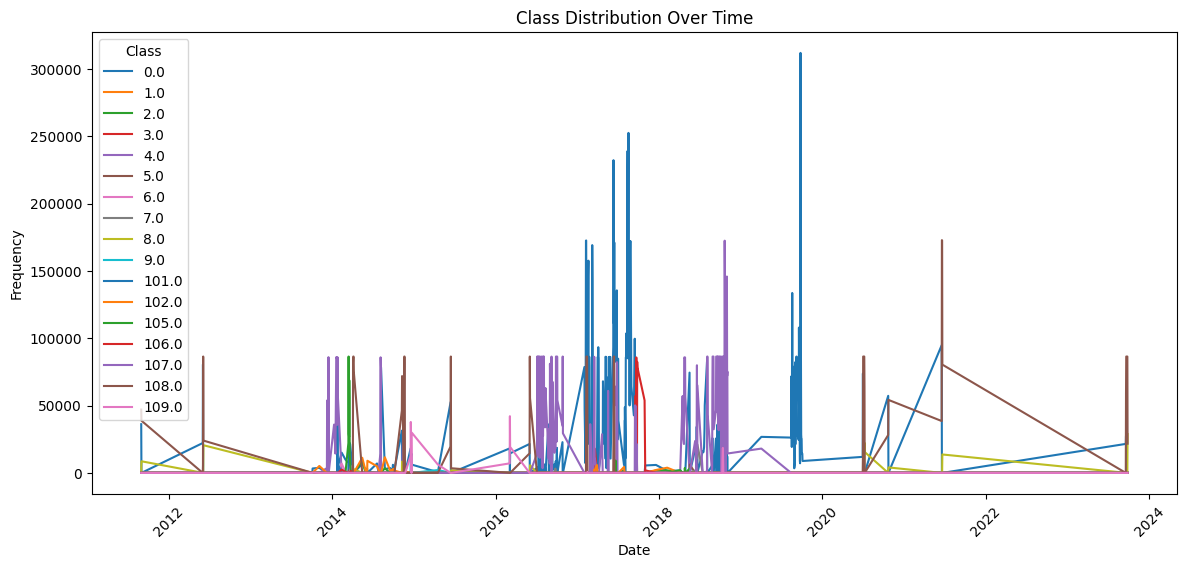

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'timestamp' to datetime format if not already done
r_df['timestamp'] = pd.to_datetime(r_df['timestamp'])

# Group by day and calculate the frequency of each class
class_over_time = r_df.groupby([r_df['timestamp'].dt.date, 'class']).size().unstack(fill_value=0)

# Plot the class frequency over time
class_over_time.plot(kind='line', figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Class Distribution Over Time')
plt.legend(title='Class')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Chi-Square Analysis

from scipy.stats import chi2_contingency

# Chi-square test for 'class' vs. 'label'
chi2_label, p_label, _, _ = chi2_contingency(crosstab_class_label)
print(f"Chi-Square Test between 'class' and 'label': Chi2 = {chi2_label}, p-value = {p_label}")

# Chi-square test for 'class' vs. 'well'
chi2_well, p_well, _, _ = chi2_contingency(crosstab_class_well)
print(f"Chi-Square Test between 'class' and 'well': Chi2 = {chi2_well}, p-value = {p_well}")

# Chi-square test for 'class' vs. 'state'
chi2_state, p_state, _, _ = chi2_contingency(crosstab_class_state)
print(f"Chi-Square Test between 'class' and 'state': Chi2 = {chi2_state}, p-value = {p_state}")


Chi-Square Test between 'class' and 'label': Chi2 = 164380558.4478602, p-value = 0.0
Chi-Square Test between 'class' and 'well': Chi2 = 121252283.69585598, p-value = 0.0
Chi-Square Test between 'class' and 'state': Chi2 = 32964025.02654064, p-value = 0.0


The results from the Chi-Square tests indicate that there is a significant association between the class feature and the categorical variables (label, well, and state). 

In [14]:
import numpy as np

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Calculate Cramér's V for class vs. label
cramers_v_class_label = cramers_v(crosstab_class_label.values)
print(f"Cramér's V for 'class' and 'label': {cramers_v_class_label}")

# Calculate Cramér's V for class vs. well
cramers_v_class_well = cramers_v(crosstab_class_well.values)
print(f"Cramér's V for 'class' and 'well': {cramers_v_class_well}")

# Calculate Cramér's V for class vs. state
cramers_v_class_state = cramers_v(crosstab_class_state.values)
print(f"Cramér's V for 'class' and 'state': {cramers_v_class_state}")


Cramér's V for 'class' and 'label': 0.7957513001227285
Cramér's V for 'class' and 'well': 0.5125761065939282
Cramér's V for 'class' and 'state': 0.3779623233106281


To measure the strength of association between class and each variable, use Cramér’s V

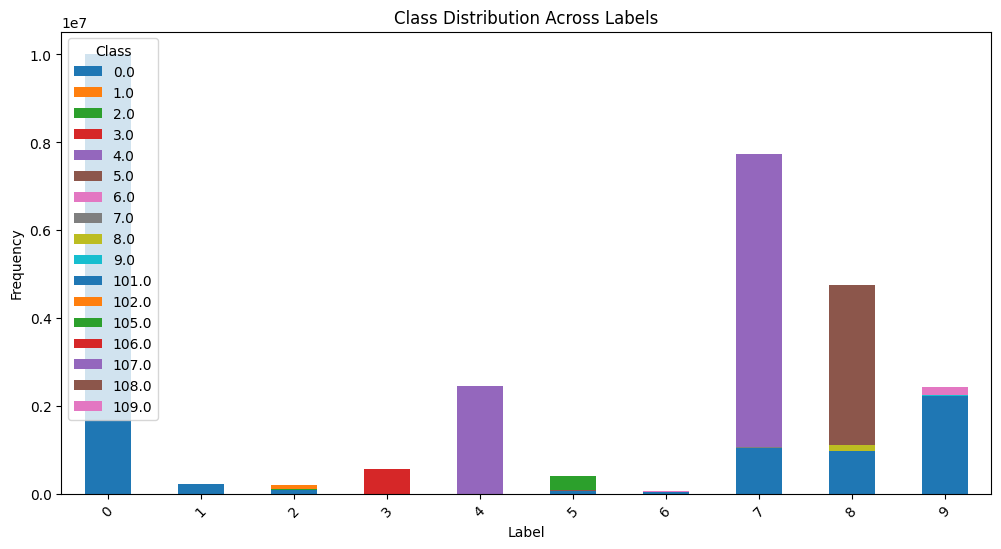

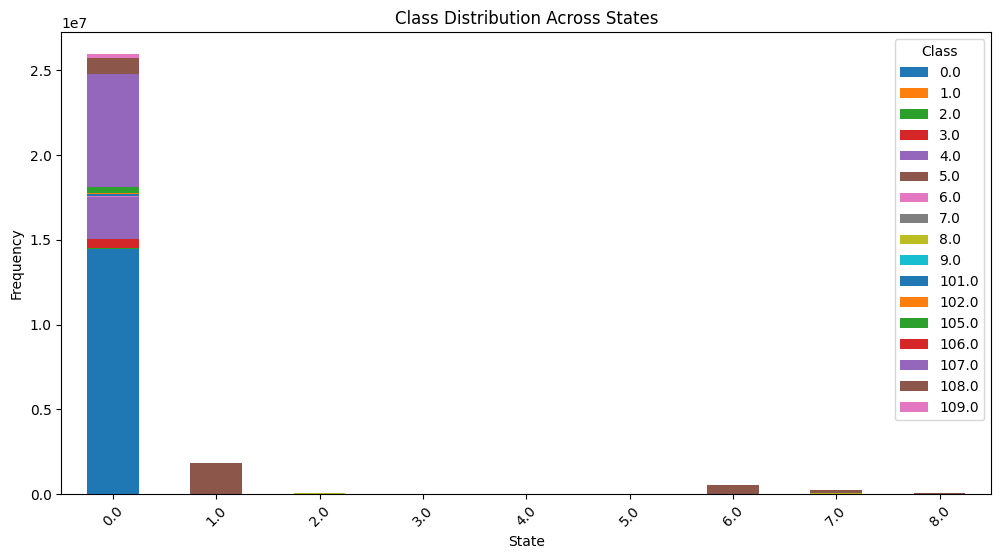

In [8]:
import seaborn as sns

# Stacked bar chart for 'class' vs. 'label'
label_class_distribution = r_df.groupby(['label', 'class']).size().unstack()
label_class_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Class Distribution Across Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.xticks(rotation=45)
plt.show()

# Stacked bar chart for 'class' vs. 'state'
state_class_distribution = r_df.groupby(['state', 'class']).size().unstack()
state_class_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Class Distribution Across States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.xticks(rotation=45)
plt.show()



C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


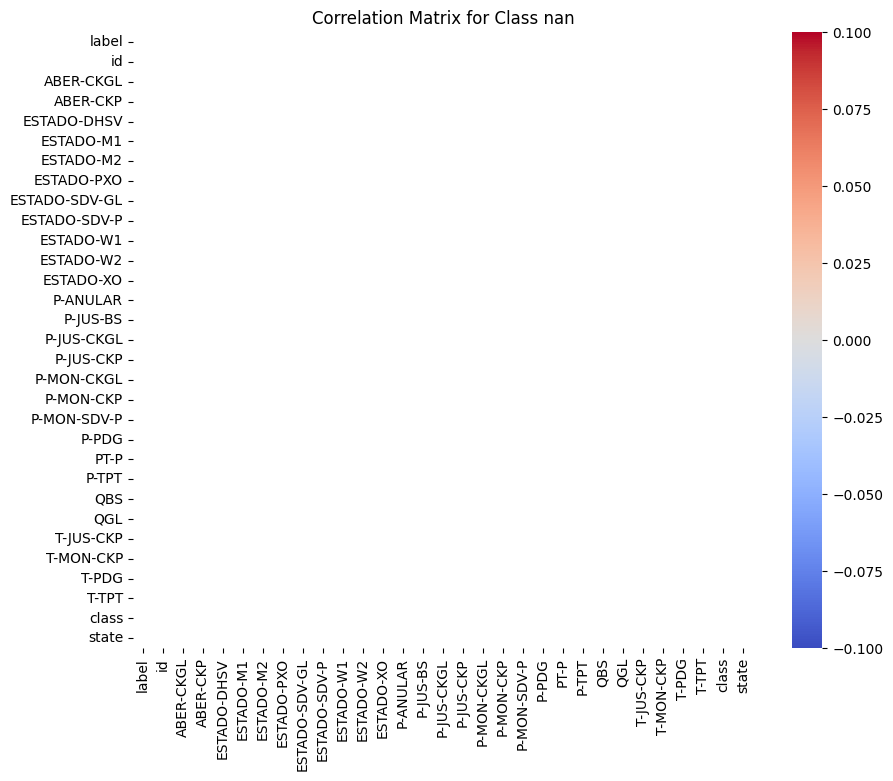

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


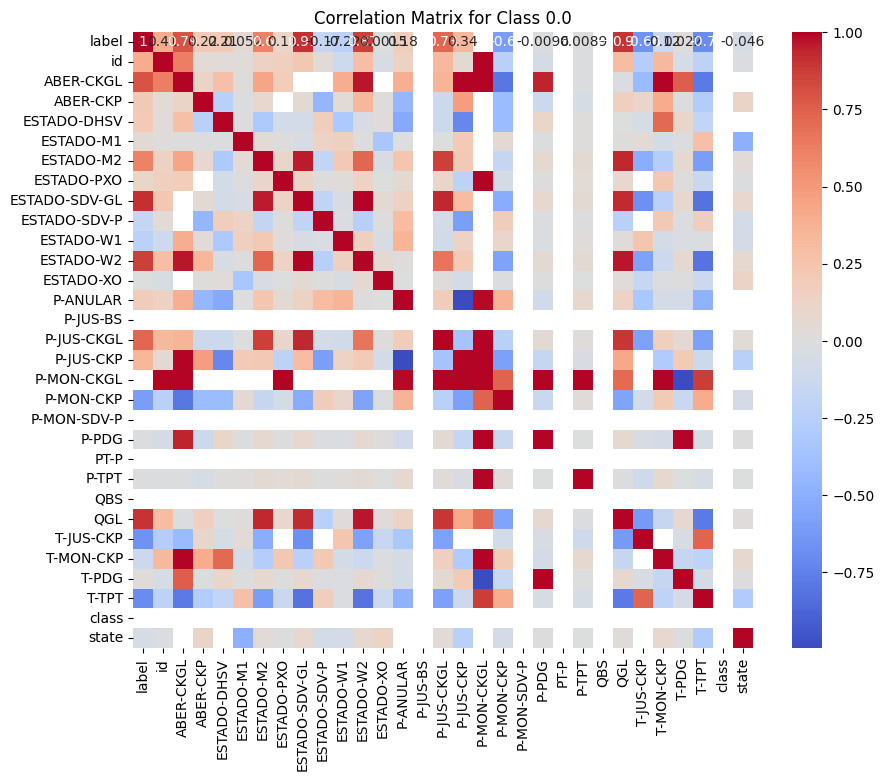

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


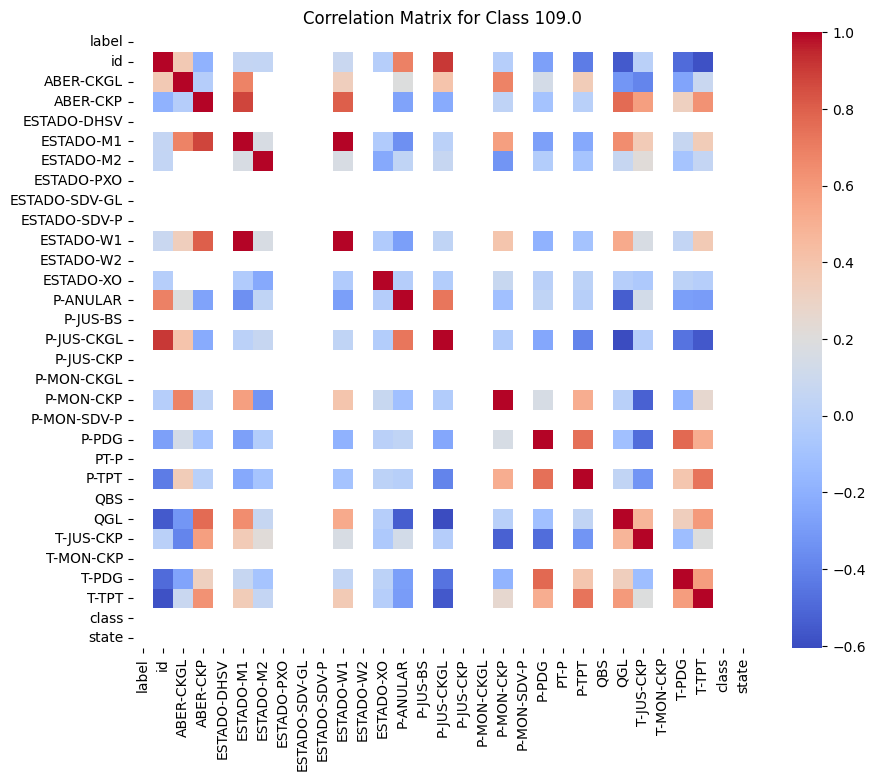

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


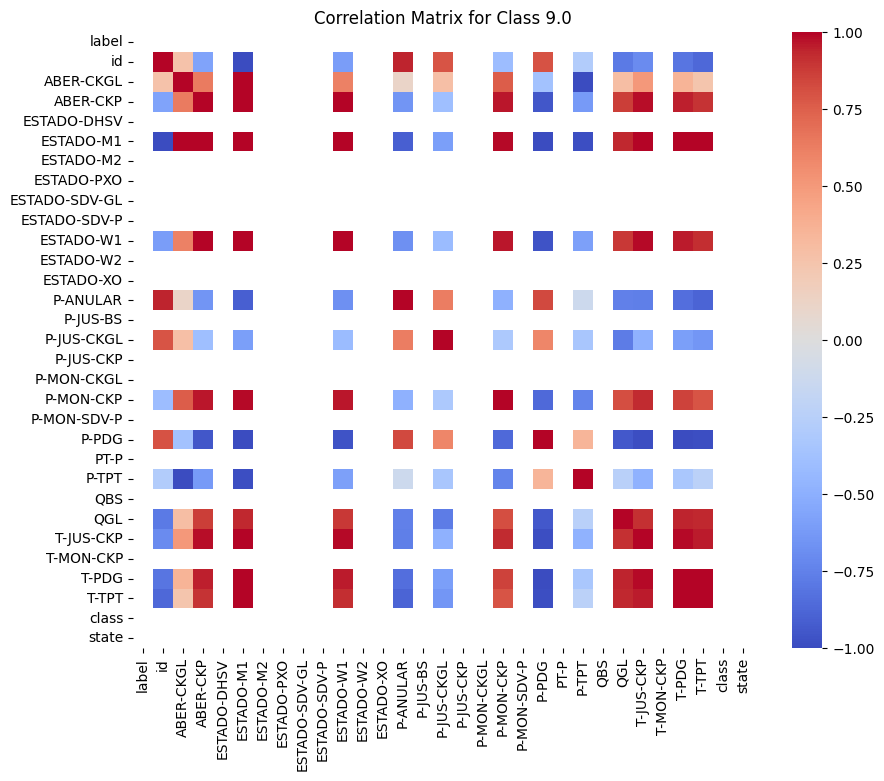

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


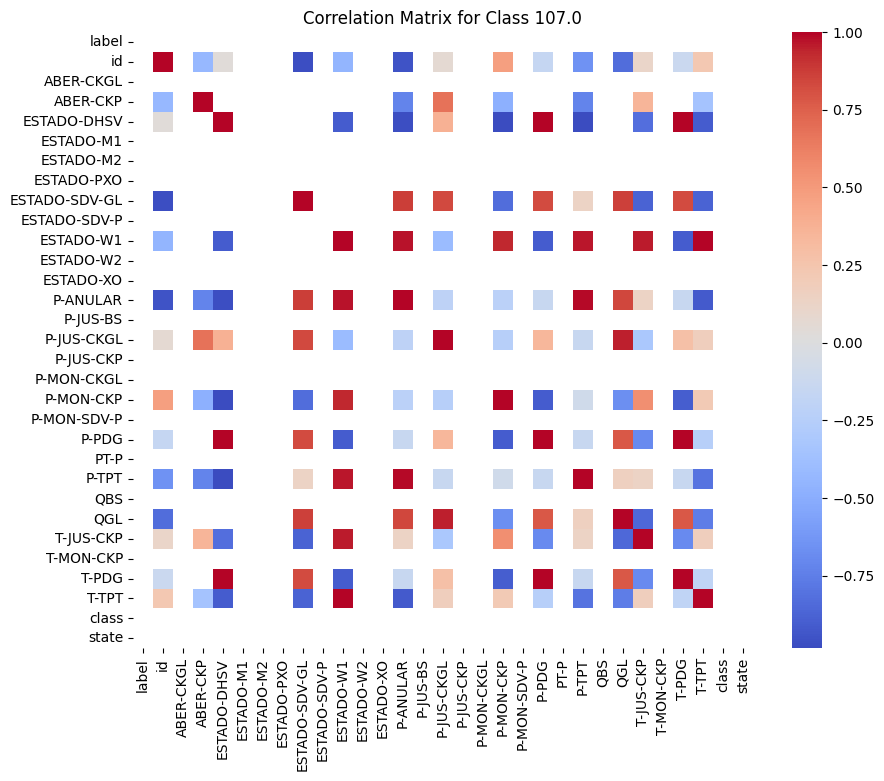

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


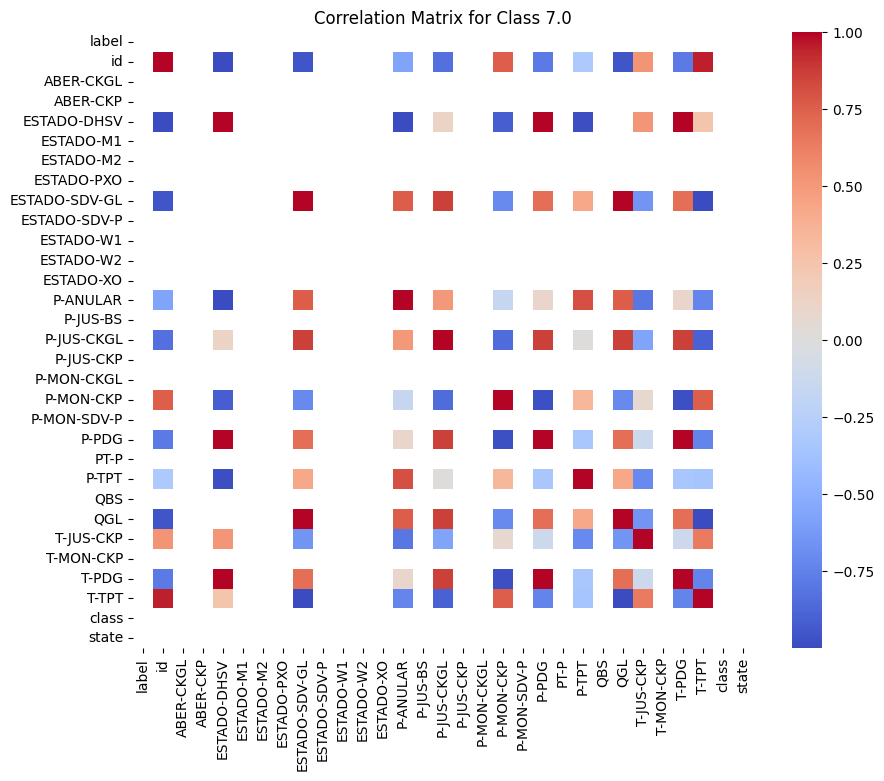

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


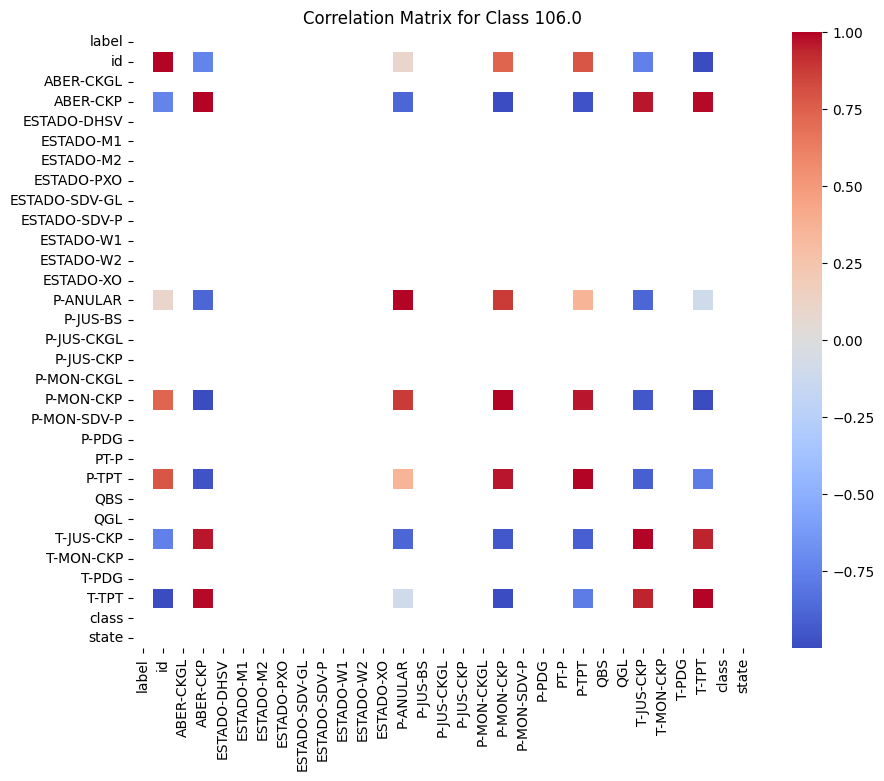

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


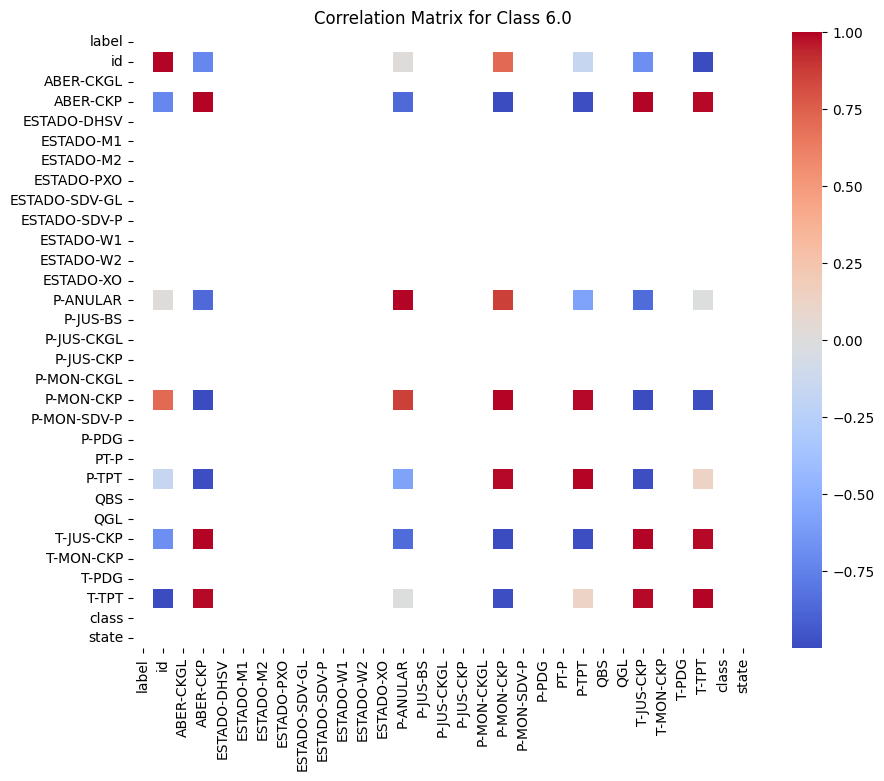

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


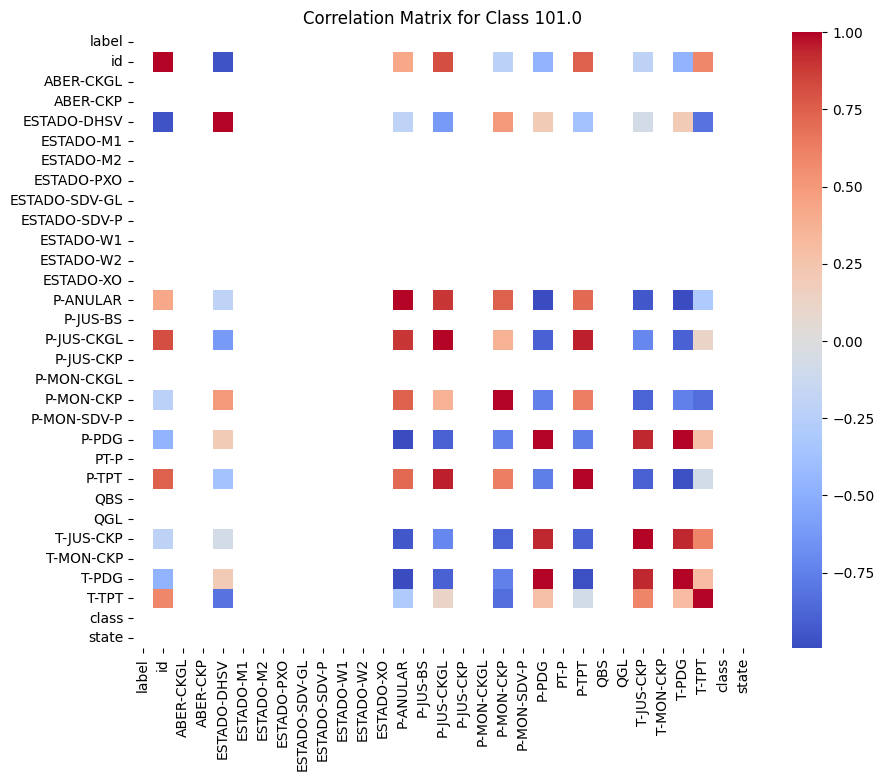

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


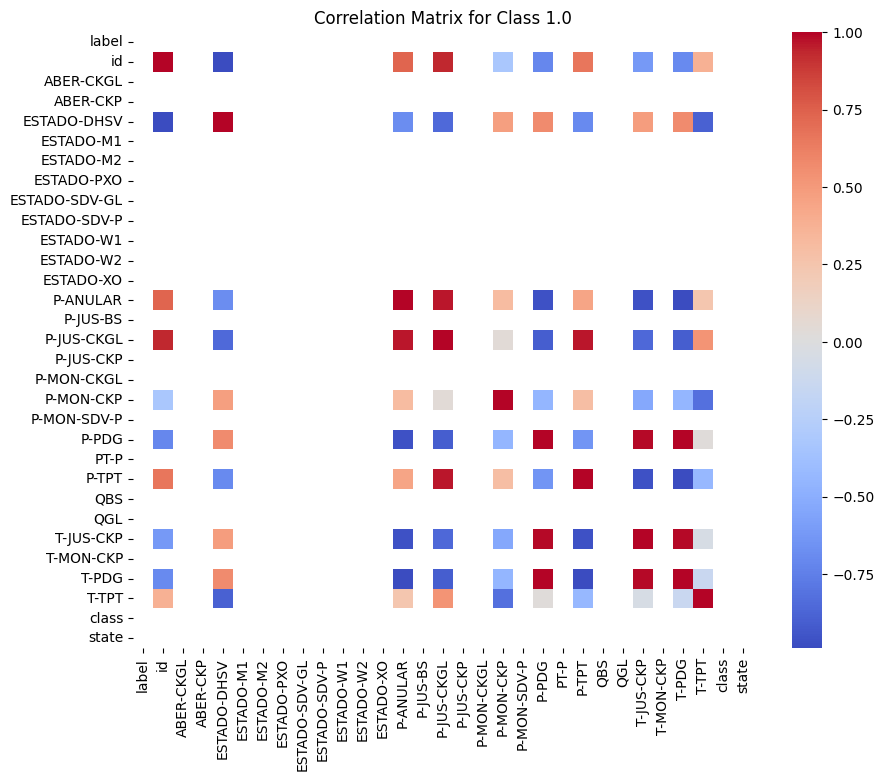

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


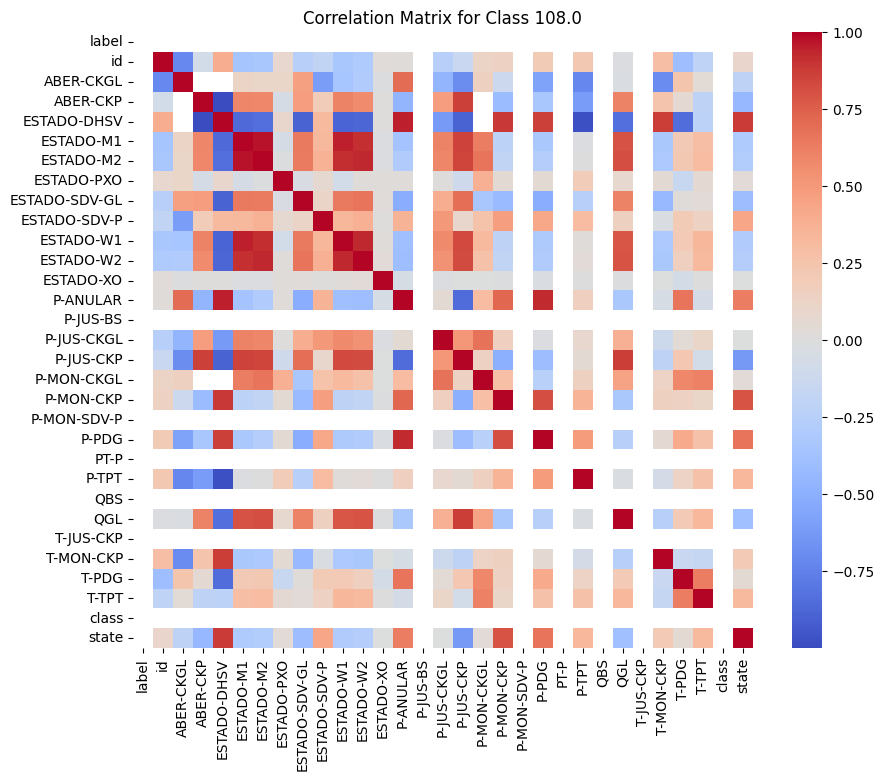

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


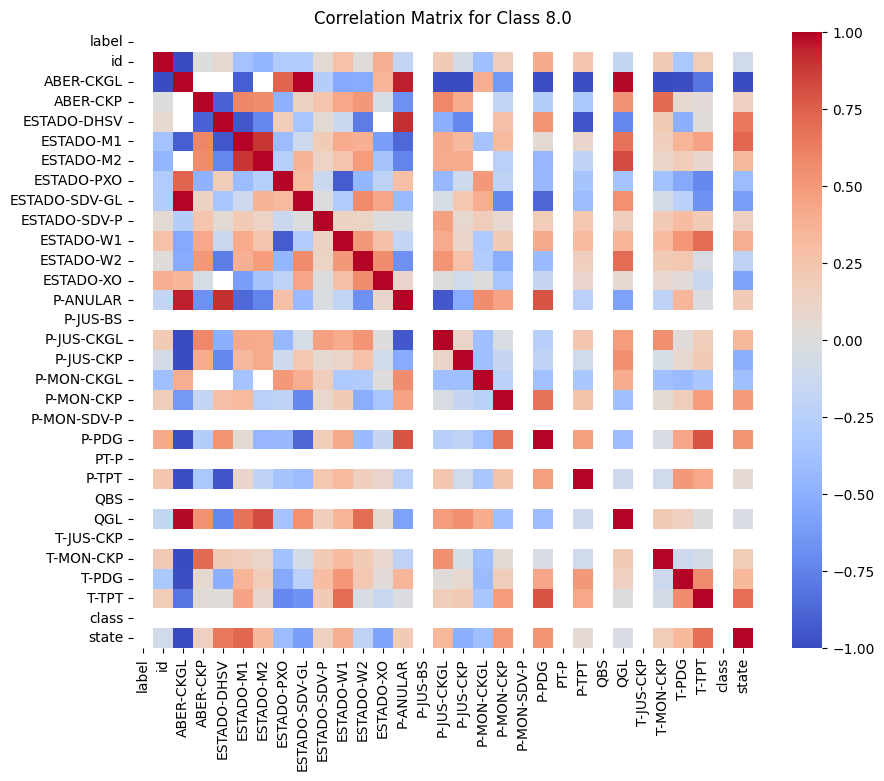

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


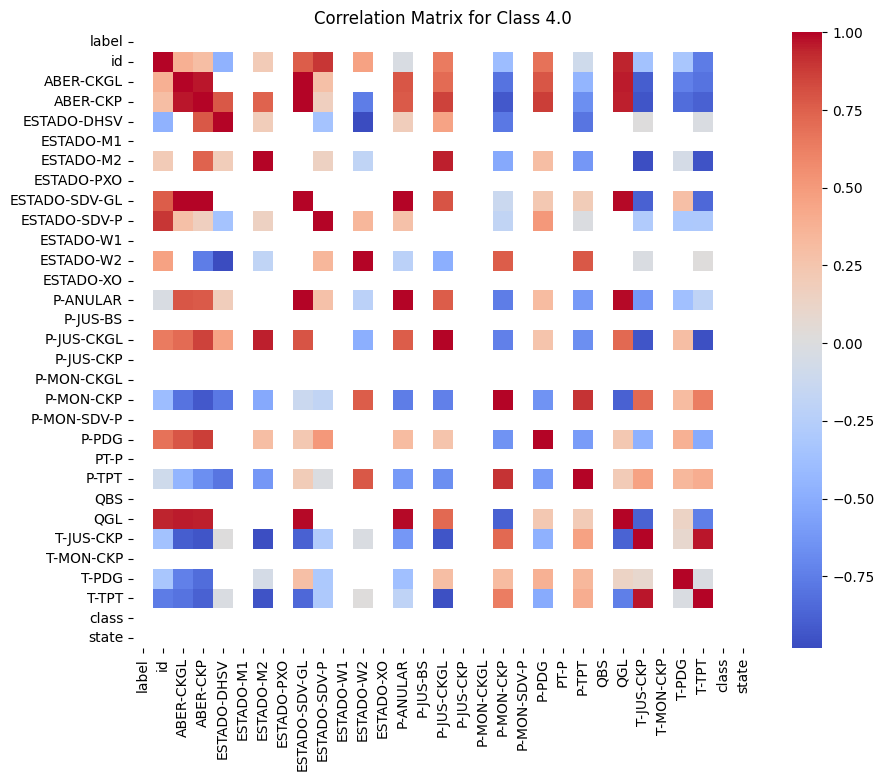

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


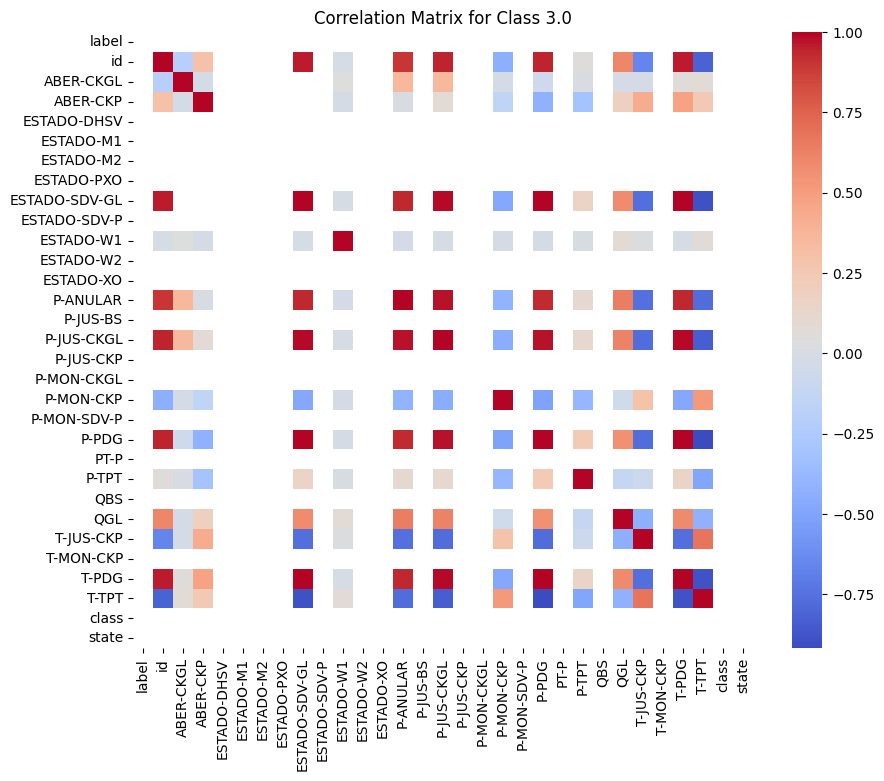

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


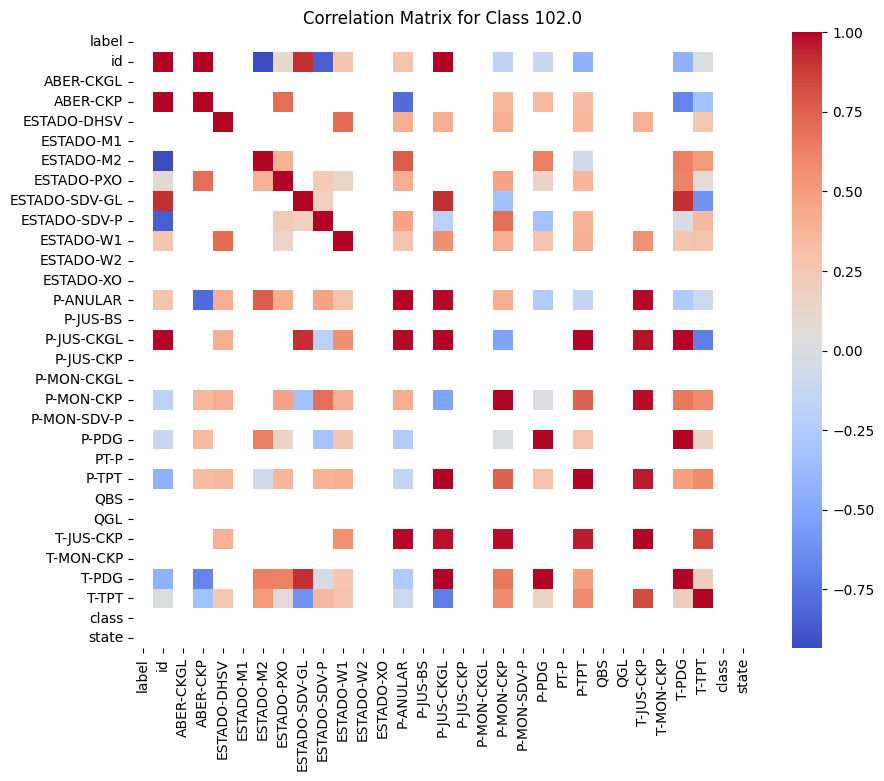

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


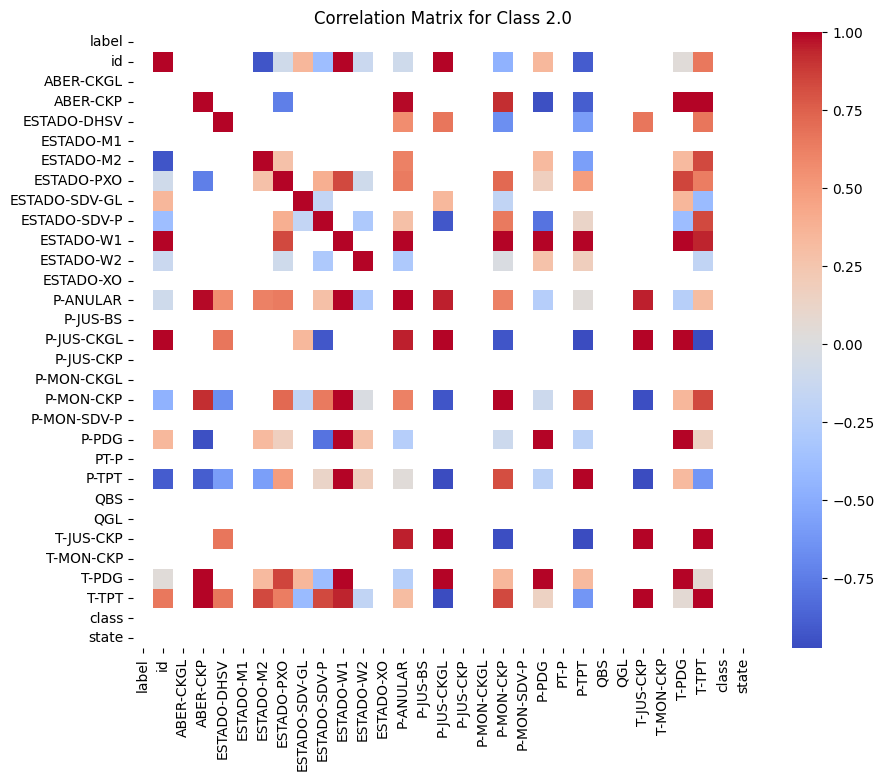

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


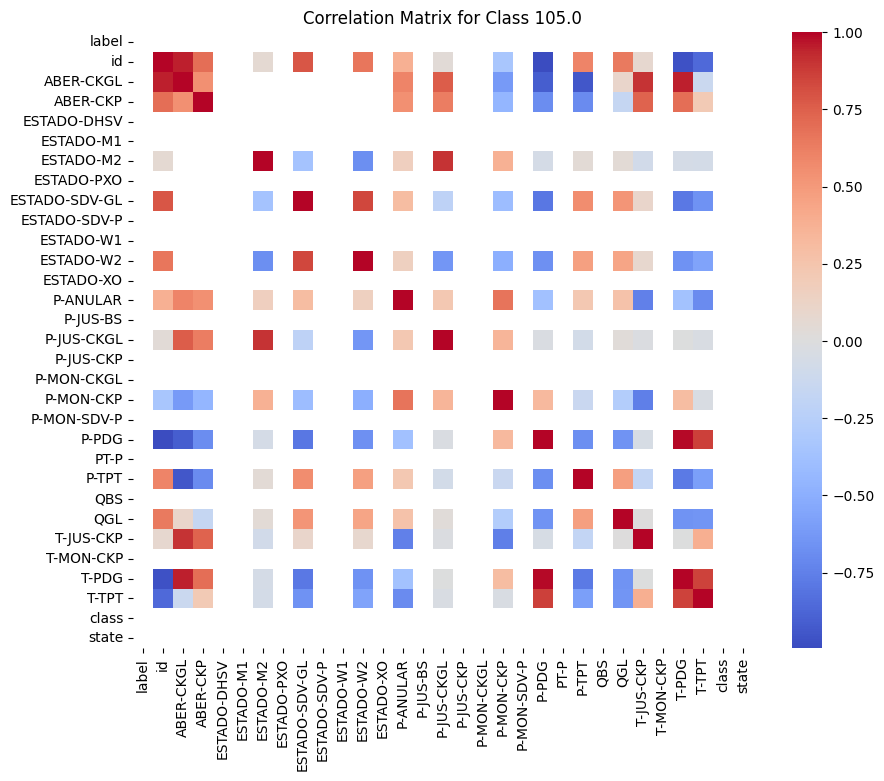

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


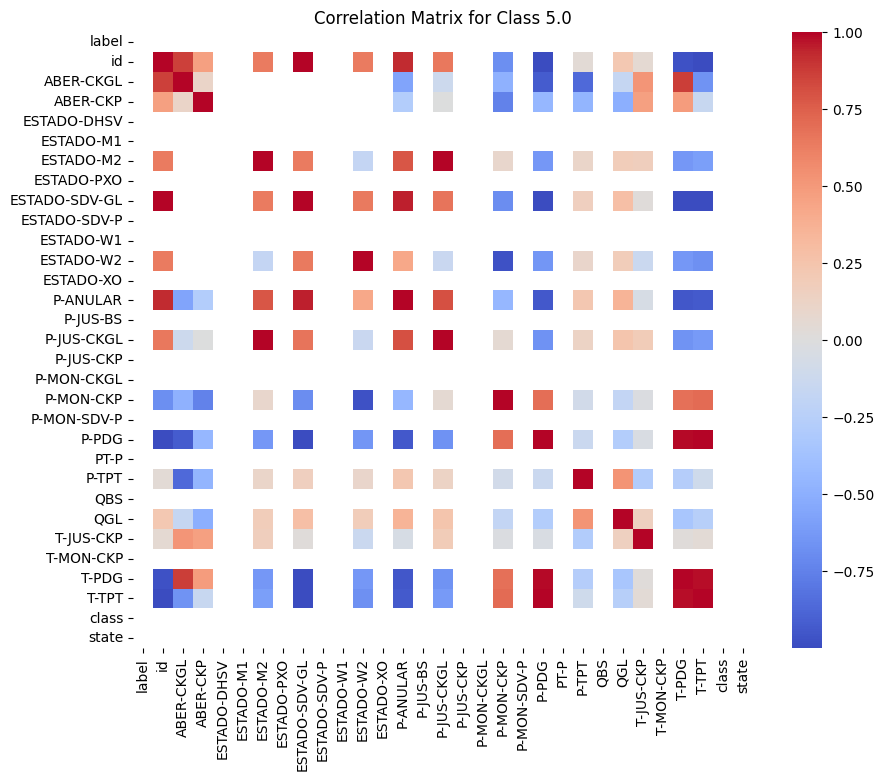

In [9]:
# Get the list of numerical columns
numerical_columns = r_df.select_dtypes(include='number').columns

# Calculate and plot correlation for each class separately
for class_value in r_df['class'].unique():
    class_subset = r_df[r_df['class'] == class_value]
    correlation_matrix = class_subset[numerical_columns].corr()
    
    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for Class {class_value}')
    plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_24788\3363809142.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  class_monthly = r_df.set_index('timestamp').groupby('class').resample('M').size().unstack(fill_value=0)


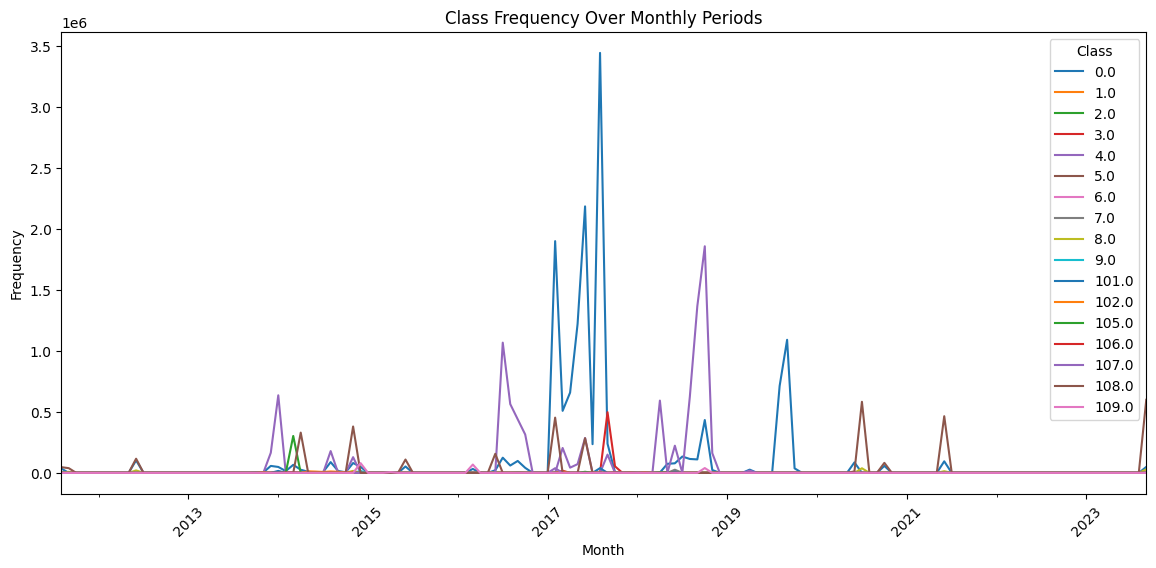

In [10]:
# Resample the data by month and calculate class frequency
class_monthly = r_df.set_index('timestamp').groupby('class').resample('M').size().unstack(fill_value=0)

# Plot the class frequency over time by month
class_monthly.T.plot(kind='line', figsize=(14, 6))
plt.title('Class Frequency Over Monthly Periods')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()


In [12]:
# Create lag features for the 'class' variable for each well
r_df['class_lag_1'] = r_df.groupby('well')['class'].shift(1)
r_df['class_lag_2'] = r_df.groupby('well')['class'].shift(2)

# Display a sample to verify lagged features
print(r_df[['timestamp', 'well', 'class', 'class_lag_1', 'class_lag_2']].head(10))


            timestamp        well  class  class_lag_1  class_lag_2
0 2014-12-17 14:27:45  WELL-00042    NaN          NaN          NaN
1 2014-12-17 14:27:46  WELL-00042    NaN          NaN          NaN
2 2014-12-17 14:27:47  WELL-00042    NaN          NaN          NaN
3 2014-12-17 14:27:48  WELL-00042    NaN          NaN          NaN
4 2014-12-17 14:27:49  WELL-00042    NaN          NaN          NaN
5 2014-12-17 14:27:50  WELL-00042    NaN          NaN          NaN
6 2014-12-17 14:27:51  WELL-00042    NaN          NaN          NaN
7 2014-12-17 14:27:52  WELL-00042    NaN          NaN          NaN
8 2014-12-17 14:27:53  WELL-00042    NaN          NaN          NaN
9 2014-12-17 14:27:54  WELL-00042    NaN          NaN          NaN


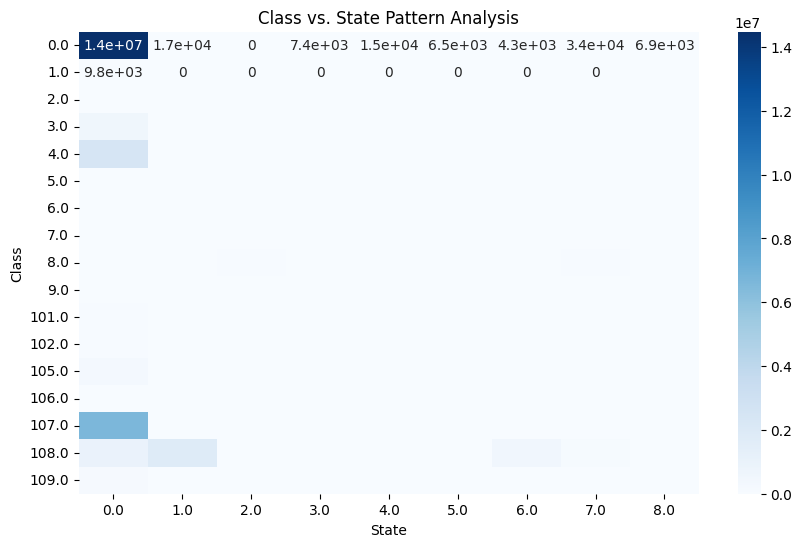

In [13]:
# Group by class and state and calculate the frequency
state_class_pattern = r_df.groupby(['class', 'state']).size().unstack(fill_value=0)

# Plot the class distribution across states using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(state_class_pattern, annot=True, cmap='Blues')
plt.title('Class vs. State Pattern Analysis')
plt.xlabel('State')
plt.ylabel('Class')
plt.show()
